# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

<a name="paragraph1"></a>
## 1. Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим датасет и выведем первые 10 строчек

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу бросается в глаза, что в некоторых столбцах много пропущенных значений. Посмотрим более подробную информацию о датасете.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из общей таблицы видно, что в датасете всего 23699 строк и 22 колонки.  
Видно, что названия некоторых столбцов требуется привести к 'snake_case' и поменять типы данных там где это требуется, например столбец `floors_total`содержит сведения о количестве этажей в доме, следовательно тип данных должен быть целочисленным (int). Так же во многих столбцах есть пропущенные значения.  
Посмотрим какое колчество пропущенных значений в столбцах.

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Действительно, почти в каждом столбце есть пропущенны значения, а в некоторых столбцах очень большое количество.  
Самое большое количество пропущенных значений в столбце `is_apartment`, видимо в нем не хватет нулей - означающих, что это не аппартаменты.  
Так же большое количество пропущенных значений в столбцах `parks_nearest` и `ponds_nearest`, видимо там схожая ситуация и не хватает нулей означающих что нет парков и водоемов, со столбцом `balcony`, скорее всего, схожая история.  
Выведем статистические показатели по всему датасету.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В датасете присутсвуют как очень большие дома, так и очень маленькие. Например есть дома высотой 60 этажей, общей площадью 900м2 или кухней 112м2. Минимальное количество комнат равно 0 - вызывает вопросы, скорее всего как минимум 1 комната есть.

<a name="end1"></a>
### Вывод

Для дальнейшей работы с таблицой необходимо сделать следующее:
1) Привсти названия столбцов к одному виду.   
2) Привести значения внутри столбцов к одному регистру.  
3) Разобраться с пропущенными значениями и проверить датасет на дубликаты.  
4) Привести столбцы к нужному типу данных.   

<a name="paragraph2"></a>
## 2. Предобработка данных

<a name="subparagraph2.1"></a>
### 2.1 Изменение названий столбцов

Для лучшей информативности изменим название колонок. Для начала выведем текущие названия столбцов

In [7]:
df.columns.to_list()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Создадим список с новыми названиями и применим его в датасету

In [8]:
columns = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']

df.columns = columns

Выведем название столбцов таблицы и убедимся, что они поменялись.

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'first_day_exposition',
       'number_of_rooms', 'ceiling_height_m', 'total_floors_in_house',
       'living_area_m2', 'floor', 'is_apartment', 'is_studio', 'is_open_plan',
       'kitchen_area_m2', 'number_of_balconies', 'town_name',
       'nearest_airport_distance_m', 'city_center_distance_m',
       'parks_numbers_within_3km', 'nearest_park_distance_m',
       'ponds_number_within_3km', 'nearest_pond_distance_m',
       'days_exposition'],
      dtype='object')

<a name="subparagraph2.2"></a>
### 2.2 Работа с пропущенными значениями

#### Посмотрим на пропущенные значения в столбце `town_name` - 'название населённого пункта'

Выведем 10 пропущенных значений

In [10]:
df[df['town_name'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17764,9,8400000.0,94.0,2016-01-24T00:00:00,3,NaN,23.0,52.0,5,NaN,...,NaN,0.0,NaN,36865.0,10976.0,0.0,NaN,1.0,856.0,305.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
22933,20,3176015.0,33.3,2015-04-22T00:00:00,1,NaN,23.0,15.4,22,NaN,...,9.0,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,427.0
23214,3,7990000.0,56.0,2016-05-31T00:00:00,2,NaN,6.0,NaN,5,False,...,NaN,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,70.0
21119,8,3500000.0,43.2,2018-11-11T00:00:00,2,NaN,4.0,NaN,2,NaN,...,NaN,NaN,NaN,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0
8568,10,16000000.0,155.0,2016-05-09T00:00:00,3,NaN,6.0,94.0,3,NaN,...,23.0,0.0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,...,8.0,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.1,5,False,...,8.3,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0


In [11]:
print('Доля пропущенных значений в столбце составлет - {:.1%}'.format(df['town_name'].isna().mean()))

Доля пропущенных значений в столбце составлет - 0.2%


Посмотрим на каком максимальном расстояние от центра Санкт-Петебруга располагаются дома

In [12]:
print('Максимальное расстояние от центра Санкт-Петебруга - {:.0f} метра'.
      format(df[df['town_name'] == 'Санкт-Петербург']['city_center_distance_m'].max()))

Максимальное расстояние от центра Санкт-Петебруга - 29493 метра


Теперь посмотрим на каком максимальном и среднем расстоянии от центра располагаются дома с пропущенными значениями

In [13]:
print('Максимальное расстояние от центра Санкт-Петебруга среди пропущенных значений - {:.0f} метра'.
      format(df[df['town_name'].isna()]['city_center_distance_m'].max()))
print('Среднее расстояние от центра Санкт-Петебруга среди пропущенных значений - {:.0f} метра'.
      format(df[df['town_name'].isna()]['city_center_distance_m'].mean()))

Максимальное расстояние от центра Санкт-Петебруга среди пропущенных значений - 41294 метра
Среднее расстояние от центра Санкт-Петебруга среди пропущенных значений - 11279 метра


Из-за того, что Ленинградская область очень большая и будет трудно предсказть где точно находится дом по имеющимся данным, а доля пропущенных значений не так велика и среднее расстояние от центра Санкт-Петербуга среди пропущенных значений попадает в область с максимальным значением по имеющимся данным, то предлагаю заменить пропущенные значения на Санкт-Петербург

In [14]:
df['town_name'].fillna('Санкт-Петербург', inplace=True)

In [15]:
print('Количество пропущенных значений в столбце "town_name" - {}'.format(df['town_name'].isna().sum()))

Количество пропущенных значений в столбце "town_name" - 0


Посмотрим на 10 значений из столбца `town_name`

In [16]:
df['town_name'].sample(10)

17532               Колпино
2006        Санкт-Петербург
14415       Санкт-Петербург
17235       Санкт-Петербург
22324       Санкт-Петербург
19640       Санкт-Петербург
882         Санкт-Петербург
11057       Санкт-Петербург
839      поселок Новый Свет
10638        посёлок Шушары
Name: town_name, dtype: object

В названиях городов встречаются типы поселений: "посёлок", "деревня" и тд. Предлагаю от них избавиться, для этого напишем функцию is_upper

In [17]:
# функция получает на вход строку
def is_upper(name):
    # создаем строку для хранения полного названия
    town_name = ''
    # проходимся по разделенной строке полученной на входе, если в ней есть заглавная буква, то сохраняем ее в созданную строку
    for city in name.split(' '):
        if city[0].isupper():
            # меняем букву "ё" на "е" и приводим к нижнему регистру
            city = city.replace('ё', 'е') + ' '
            city = city.lower()
            town_name += city
    # возвращаем созданную встроку
    return town_name.rstrip()

# сохраняем полученные значения в список
new_town_name = []            
for name in df['town_name']:
    new_town_name.append(is_upper(name))

Посмотрим на полученный список

In [18]:
new_town_name

['санкт-петербург',
 'шушары',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'янино-1',
 'парголово',
 'санкт-петербург',
 'мурино',
 'санкт-петербург',
 'санкт-петербург',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'парголово',
 'санкт-петербург',
 'кудрово',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'пушкин',
 'санкт-петербург',
 'коммунар',
 'санкт-петербург',
 'санкт-петербург',
 'колпино',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'красный бор',
 'мурино',
 'санкт-петербург',
 'парголово',
 'санкт-петербург',
 'петергоф',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'гатчина',
 'санкт-петербург',
 'санкт-петербург',
 'пушкин',
 'санкт-петербург',
 'санкт-петербург',
 'парголово',
 'санкт-петербург',
 'санкт-петербург',
 'санкт-петербург',
 'шушар

Все получилось, в строках нет лишней информации. Теперь заменим данные на полученные строки для столбца `town_name`

In [19]:
df['town_name'] = new_town_name

Выведем 10 значений из столбца `town_name` и убедимся, что все применилось

In [20]:
df['town_name'].head(10)

0    санкт-петербург
1             шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
5            янино-1
6          парголово
7    санкт-петербург
8             мурино
9    санкт-петербург
Name: town_name, dtype: object

#### Займемся столбцом `number_of_rooms` - 'число комнат'

Ранее мы видели, что есть количество комнат равное нулю. Посмотрим на эти значения.

In [21]:
df[df['number_of_rooms']==0].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
8755,1,1350000.0,18.80,2017-11-22T00:00:00,0,2.75,19.0,15.8,1,NaN,...,NaN,NaN,санкт-петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
8718,10,4000000.0,26.00,2018-02-27T00:00:00,0,2.80,16.0,22.0,7,NaN,...,NaN,2.0,санкт-петербург,10796.0,14361.0,0.0,NaN,0.0,NaN,50.0
19477,11,2300000.0,20.00,2017-11-10T00:00:00,0,NaN,10.0,16.0,1,NaN,...,NaN,NaN,санкт-петербург,29791.0,12652.0,0.0,NaN,1.0,815.0,35.0
7818,11,3300000.0,27.30,2018-04-06T00:00:00,0,NaN,20.0,NaN,9,NaN,...,NaN,2.0,санкт-петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,31.0
3147,7,2170000.0,31.00,2017-12-30T00:00:00,0,2.60,12.0,NaN,12,NaN,...,NaN,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
11331,6,1315000.0,27.32,2017-09-29T00:00:00,0,2.70,15.0,18.7,15,NaN,...,NaN,NaN,никольское,NaN,NaN,NaN,NaN,NaN,NaN,116.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.0,1,NaN,...,NaN,0.0,шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
1220,5,3300000.0,27.00,2017-11-10T00:00:00,0,2.80,17.0,20.0,16,NaN,...,NaN,NaN,санкт-петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0
22416,5,2750000.0,27.30,2019-04-24T00:00:00,0,2.70,27.0,19.0,10,NaN,...,NaN,2.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12992,5,2500000.0,29.00,2019-04-17T00:00:00,0,NaN,9.0,20.0,3,NaN,...,NaN,NaN,санкт-петербург,45274.0,21206.0,0.0,NaN,3.0,319.0,5.0


In [22]:
print('Количество значений с количество комнат равных нулю - {} шт'.format(df[df['number_of_rooms']==0]['number_of_rooms'].count()))

Количество значений с количество комнат равных нулю - 197 шт


Как мы видим, жилая площадь в таких квартирах присутствует, поэтому предлагаю изменить значение с 0 на 1.

In [23]:
df['number_of_rooms'] = df['number_of_rooms'].replace(0,1)

In [24]:
print('Количество значений с количество комнат равных нулю - {} шт'.format(df[df['number_of_rooms']==0]['number_of_rooms'].count()))

Количество значений с количество комнат равных нулю - 0 шт


#### Посмотрим на пропущенные значения в столбце `is_apartment` - 'апартаменты'

Посмотрим на значения внутри столбца и их количество.

In [25]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Выведем 10 строк с пропущенными значениями в таблице

In [26]:
df[df['is_apartment'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
23616,11,7400000.0,74.7,2018-12-17T00:00:00,4,NaN,9.0,54.8,6,NaN,...,7.0,NaN,санкт-петербург,16636.0,11741.0,0.0,NaN,0.0,NaN,77.0
10647,18,6450000.0,65.4,2018-03-23T00:00:00,2,2.70,20.0,37.0,11,NaN,...,11.6,NaN,санкт-петербург,15339.0,13512.0,0.0,NaN,0.0,NaN,60.0
13405,5,13330000.0,83.0,2019-02-08T00:00:00,3,NaN,20.0,52.0,2,NaN,...,11.0,1.0,санкт-петербург,35312.0,14768.0,0.0,NaN,1.0,791.0,NaN
11184,19,4800000.0,67.1,2018-08-20T00:00:00,2,2.75,18.0,32.0,9,NaN,...,18.0,1.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,29.0
13049,9,2750000.0,40.8,2017-09-05T00:00:00,1,2.65,27.0,18.0,21,NaN,...,12.0,NaN,мурино,NaN,NaN,NaN,NaN,NaN,NaN,107.0
5637,0,4500000.0,80.6,2017-10-10T00:00:00,3,3.00,15.0,50.0,6,NaN,...,11.0,2.0,новое девяткино,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5226,20,6900000.0,69.5,2017-08-01T00:00:00,2,2.64,24.0,28.3,21,NaN,...,10.6,2.0,санкт-петербург,43256.0,12013.0,0.0,NaN,0.0,NaN,48.0
3060,17,6600000.0,84.4,2018-02-01T00:00:00,4,NaN,12.0,52.6,12,NaN,...,8.7,2.0,колпино,26709.0,32496.0,1.0,787.0,1.0,664.0,105.0
10583,10,6700000.0,67.0,2019-03-21T00:00:00,2,3.00,5.0,43.0,3,NaN,...,10.0,NaN,санкт-петербург,21609.0,5340.0,1.0,371.0,3.0,362.0,13.0
23077,10,12500000.0,107.0,2017-09-25T00:00:00,4,NaN,5.0,NaN,4,NaN,...,NaN,NaN,санкт-петербург,24190.0,2364.0,2.0,287.0,3.0,467.0,229.0


Аппартаменты относятся к коммерческой недвижимости, поэтому люди владеющие аппратаментами наверняка это знают и указали, а вот пропущенные значения, скорее всего, относятся к жилым квартирам.  
Предлагаю заменить пропущеные значения в столбце `is_apartment` на False.

In [27]:
df['is_apartment'].fillna(False, inplace=True)

Убедимся, что значения поменялись

In [28]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

#### Посмотрим на пропущенные значения в столбце `number_of_balconies` - 'число балконов'

Выведем 10 пропущенных значений

In [29]:
df[df['number_of_balconies'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
20051,12,18700000.0,134.00,2017-10-13T00:00:00,4,3.40,6.0,80.0,3,False,...,10.0,NaN,санкт-петербург,31919.0,4080.0,1.0,705.0,2.0,627.0,89.0
7761,7,6598000.0,46.00,2018-04-02T00:00:00,1,NaN,20.0,20.0,7,False,...,12.0,NaN,санкт-петербург,39106.0,10330.0,2.0,386.0,3.0,94.0,47.0
22737,6,21501000.0,147.98,2019-02-24T00:00:00,4,3.08,11.0,NaN,1,False,...,22.3,NaN,санкт-петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,NaN
19286,15,4190000.0,54.60,2018-06-16T00:00:00,2,2.70,12.0,28.0,1,False,...,11.0,NaN,мурино,NaN,NaN,NaN,NaN,NaN,NaN,116.0
3161,1,9000000.0,101.00,2018-03-20T00:00:00,4,3.00,7.0,68.6,7,False,...,10.0,NaN,санкт-петербург,20317.0,15277.0,3.0,156.0,3.0,681.0,74.0
3903,5,5450000.0,46.00,2019-02-26T00:00:00,2,NaN,5.0,NaN,3,False,...,NaN,NaN,санкт-петербург,10264.0,12884.0,0.0,NaN,0.0,NaN,NaN
5494,10,3680000.0,36.40,2018-08-08T00:00:00,1,NaN,23.0,14.7,14,False,...,9.7,NaN,санкт-петербург,11555.0,12099.0,0.0,NaN,1.0,527.0,18.0
11344,7,5500000.0,56.70,2017-04-14T00:00:00,2,2.88,5.0,33.8,2,False,...,8.8,NaN,санкт-петербург,15875.0,8872.0,1.0,497.0,1.0,1207.0,453.0
2413,7,6750000.0,69.00,2017-10-02T00:00:00,2,NaN,5.0,44.0,1,False,...,12.0,NaN,санкт-петербург,21716.0,4346.0,0.0,NaN,1.0,256.0,NaN
15532,15,3500000.0,35.00,2017-12-25T00:00:00,1,NaN,9.0,15.0,8,False,...,11.0,NaN,пушкин,18271.0,32842.0,1.0,63.0,0.0,NaN,231.0


Посмотрим как распределяются пропущенные значения по этажам

In [30]:
df[df['number_of_balconies'].isna()]['floor'].value_counts()

1     1926
2     1779
3     1516
4     1356
5     1238
6      593
7      508
8      471
9      412
10     282
11     216
12     207
13     149
14     141
16     138
15     123
17     101
18      74
19      56
21      50
22      50
23      40
20      36
24      23
25      21
26       6
27       5
30       1
31       1
Name: floor, dtype: int64

На первых этажах действительно чаще всего не бывает балконов, далее тенденция идет на спад, что очень похоже на правду. Скорее всего в этих квартирах действительно нет балконов, поэтому предлагаю заменить пропущенные значения на 0.

In [31]:
df['number_of_balconies'].fillna(0, inplace=True)

Убедимся что в столбце `number_of_balconies` больше нет пропущенных значений.

In [32]:
print('Количество пропущенных значений в столбце number_of_balconies - {}'.
      format(df['number_of_balconies'].isna().sum()))

Количество пропущенных значений в столбце number_of_balconies - 0


#### Посмотрим на пропущенные значения в столбце `nearest_airport_distance_m` - 'расстояние до ближайшего аэропорта в метрах'

Из полученных данных было видно, что ближайший аэропорт находится в 0 метрах от дома, вряд ли такое может быть.  
Выведем строки со значением равным 0.

In [33]:
df[df['nearest_airport_distance_m'] == df['nearest_airport_distance_m'].min()]

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Получено всего 1 такое значение, видимо была допущена какая-то ошибка, дом не может находиться прямо в аэропорту.  
Предлагаю пока заменить его на значение None.

In [34]:
df.loc[df['nearest_airport_distance_m']==0, 'nearest_airport_distance_m'] = None

Убедимся, что ближайший дом теперь находится не в аэропорту

In [35]:
print('Минимальное расстояние до аэропорта - {:.0f} метров'
      .format(df['nearest_airport_distance_m'].min()))

Минимальное расстояние до аэропорта - 6450 метров


Посмотрим на пропущенные значения в столбце `nearest_airport_distance_m` и посмотрим на их долю от общего количества

In [36]:
df[df['nearest_airport_distance_m'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
16127,5,1300000.0,45.0,2016-05-18T00:00:00,2,NaN,5.0,32.0,1,False,...,5.0,1.0,извара,NaN,NaN,NaN,NaN,NaN,NaN,107.0
6626,10,5600000.0,72.0,2016-01-28T00:00:00,3,NaN,5.0,47.2,1,False,...,6.5,0.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,323.0
6331,10,3550000.0,39.5,2017-09-09T00:00:00,1,2.75,11.0,18.1,9,False,...,11.3,1.0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7207,17,1400000.0,44.6,2019-01-30T00:00:00,2,2.50,5.0,30.0,3,False,...,NaN,0.0,кириши,NaN,NaN,NaN,NaN,NaN,NaN,23.0
12514,13,3740000.0,38.2,2017-06-07T00:00:00,1,NaN,22.0,17.3,1,False,...,10.0,0.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,275.0
5258,12,1850000.0,31.0,2018-04-03T00:00:00,1,2.50,5.0,17.1,5,False,...,6.9,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,189.0
4599,8,1100000.0,29.7,2018-07-16T00:00:00,1,2.50,5.0,15.3,5,False,...,6.5,0.0,нурма,NaN,NaN,NaN,NaN,NaN,NaN,89.0
5412,1,3960000.0,64.9,2018-01-10T00:00:00,2,2.60,8.0,37.5,2,False,...,13.4,2.0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,237.0
14596,16,3550000.0,34.4,2018-08-27T00:00:00,1,NaN,14.0,16.0,10,False,...,10.0,0.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,74.0
6242,10,2500000.0,53.8,2018-02-20T00:00:00,2,NaN,4.0,29.9,2,False,...,8.6,0.0,волосово,NaN,NaN,NaN,NaN,NaN,NaN,371.0


In [37]:
print('Доля пропущенных значений в столбце nearest_airport_distance_m - {:.1%}'.
      format(len(df[df['nearest_airport_distance_m'].isna()])/len(df)))

Доля пропущенных значений в столбце nearest_airport_distance_m - 23.4%


Пропущенных значений дествительно много, попробуем вывести информацию по среднему расстоянию до аэропорта по городам

In [38]:
airport_distance = df.pivot_table(index='town_name', values='nearest_airport_distance_m', aggfunc='mean')
airport_distance

,nearest_airport_distance_m
town_name,
александровская,12896.500000
белоостров,57769.000000
зеленогорск,73300.250000
колпино,26375.863501
красное село,26595.579545
кронштадт,67469.263158
левашово,52693.000000
лисий нос,55302.333333
ломоносов,48308.280303


In [39]:
print('Есть информация по расстоянию до аэропорта только для {} городов среди {} городов'.
      format(len(airport_distance), len(df['town_name'].unique())))

Есть информация по расстоянию до аэропорта только для 27 городов среди 305 городов


Очевидно, что при заполнении или выгрузке данных была допущена ошибка, поэтому восстановить данные однозначно не получится, поэтому предлагаю просто заменить данные значения на медианные.

In [40]:
df['nearest_airport_distance_m'].fillna(df.groupby('town_name')['nearest_airport_distance_m'].transform('median'), inplace=True)

In [41]:
df['nearest_airport_distance_m'].fillna(df['nearest_airport_distance_m'].median(), inplace=True)

In [42]:
print('Количество пропущенных значений в столбце nearest_airport_distance_m - {} шт'.
      format(df['nearest_airport_distance_m'].isna().sum()))

Количество пропущенных значений в столбце nearest_airport_distance_m - 0 шт


#### Посмотрим на пропущенные значения в столбце `city_center_distance_m` - 'расстояние до центра города'

Посмотрим на пропущенные значения в столбце `city_center_distance_m` и посмотрим на их долю от общего количества

In [43]:
df[df['city_center_distance_m'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
16810,13,1600000.0,39.60,2019-04-04T00:00:00,2,NaN,2.0,25.90,1,False,...,6.60,0.0,гатчина,27179.0,NaN,NaN,NaN,NaN,NaN,NaN
1886,6,5355000.0,71.33,2015-09-20T00:00:00,2,2.70,25.0,26.29,24,False,...,25.34,0.0,кудрово,27179.0,NaN,NaN,NaN,NaN,NaN,760.0
18785,6,2100000.0,55.10,2017-12-06T00:00:00,2,2.70,3.0,27.70,1,False,...,9.80,0.0,парицы,27179.0,NaN,NaN,NaN,NaN,NaN,84.0
16197,12,2350000.0,33.00,2017-09-15T00:00:00,1,2.50,5.0,19.00,4,False,...,6.00,0.0,отрадное,27179.0,NaN,NaN,NaN,NaN,NaN,496.0
22784,17,2550000.0,35.90,2018-07-13T00:00:00,1,NaN,11.0,16.50,10,False,...,10.10,2.0,всеволожск,27179.0,NaN,NaN,NaN,NaN,NaN,44.0
3761,19,4750000.0,45.00,2019-02-22T00:00:00,2,2.50,12.0,14.00,8,False,...,20.00,0.0,кудрово,27179.0,NaN,NaN,NaN,NaN,NaN,NaN
14899,1,3100000.0,43.90,2019-04-24T00:00:00,2,NaN,4.0,29.90,3,False,...,5.20,0.0,мурино,51553.0,NaN,NaN,NaN,NaN,NaN,NaN
7341,12,4200000.0,55.50,2017-11-17T00:00:00,2,2.50,5.0,30.00,4,False,...,8.50,2.0,гатчина,27179.0,NaN,NaN,NaN,NaN,NaN,NaN
3297,9,1900000.0,42.00,2017-10-30T00:00:00,1,2.50,4.0,27.00,3,False,...,6.00,0.0,никольское,27179.0,NaN,NaN,NaN,NaN,NaN,218.0
2079,9,4200000.0,70.00,2019-03-13T00:00:00,2,3.83,4.0,46.00,4,False,...,9.00,0.0,выборг,27179.0,NaN,NaN,NaN,NaN,NaN,45.0


In [44]:
print('Доля пропущенных значений в столбце city_center_distance_m - {:.1%}'.
      format(len(df[df['city_center_distance_m'].isna()])/len(df)))

Доля пропущенных значений в столбце city_center_distance_m - 23.3%


In [45]:
center_distance = df.pivot_table(index='town_name', values='city_center_distance_m', aggfunc='mean')
center_distance

,city_center_distance_m
town_name,
александровская,27468.000000
белоостров,38868.000000
зеленогорск,54617.583333
колпино,32113.771513
красное село,30020.284091
кронштадт,49195.726316
левашово,25727.000000
лисий нос,27613.333333
ломоносов,50739.969697


In [46]:
print('Есть информация по расстоянию до центра только для {} городов среди {} городов'.
      format(len(center_distance), len(df['town_name'].unique())))

Есть информация по расстоянию до центра только для 27 городов среди 305 городов


Данные отсутствуют по тем же городам, что и в столбце nearest_airport_distance_m.  
Очевидно, что при заполнении или выгрузке данных была допущена ошибка, поэтому восстановить данные однозначно не получится. Предлагаю заполнить эти пропуски медианным значением.

In [47]:
df['city_center_distance_m'].fillna(df.groupby('town_name')['city_center_distance_m'].transform('median'), inplace=True)

In [48]:
print('Количество пропущенных значений в столбце city_center_distance_m - {} шт'.
      format(df['nearest_airport_distance_m'].isna().sum()))

Количество пропущенных значений в столбце city_center_distance_m - 0 шт


#### Посмотрим на пропущенные значения в столбце `nearest_park_distance_m` - 'расстояние до ближайшего парка'

Выведем 10 строк с пропущенными значениями

In [49]:
df[df['nearest_park_distance_m'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
11368,7,2870000.0,29.00,2019-02-11T00:00:00,1,2.70,6.0,14.4,2,False,...,8.4,0.0,шушары,18012.0,24308.0,0.0,NaN,1.0,888.0,NaN
14035,4,2300000.0,43.80,2019-01-26T00:00:00,2,NaN,5.0,33.2,2,False,...,5.5,1.0,кингисепп,27179.0,NaN,NaN,NaN,NaN,NaN,48.0
15069,10,4200000.0,54.60,2017-03-04T00:00:00,2,NaN,5.0,30.0,1,False,...,10.8,0.0,шушары,17940.0,31213.0,0.0,NaN,0.0,NaN,325.0
18355,20,5200000.0,47.80,2017-08-15T00:00:00,1,NaN,16.0,21.2,14,False,...,13.6,0.0,санкт-петербург,52239.0,16464.0,0.0,NaN,1.0,754.0,3.0
11331,6,1315000.0,27.32,2017-09-29T00:00:00,1,2.70,15.0,18.7,15,False,...,NaN,0.0,никольское,27179.0,NaN,NaN,NaN,NaN,NaN,116.0
7351,7,3300000.0,74.00,2018-10-23T00:00:00,3,2.65,5.0,42.3,3,False,...,8.5,0.0,коммунар,27179.0,NaN,NaN,NaN,NaN,NaN,109.0
1909,13,3400000.0,30.90,2017-02-22T00:00:00,1,NaN,5.0,16.9,3,False,...,5.5,0.0,санкт-петербург,16877.0,11982.0,0.0,NaN,0.0,NaN,76.0
6733,2,2800000.0,36.20,2017-12-08T00:00:00,1,2.50,5.0,17.5,5,False,...,8.5,1.0,гатчина,27179.0,NaN,NaN,NaN,NaN,NaN,46.0
6429,13,5699000.0,92.70,2015-07-24T00:00:00,3,2.80,5.0,53.3,3,False,...,10.7,0.0,сертолово,27179.0,NaN,NaN,NaN,NaN,NaN,385.0
2156,9,5950000.0,51.00,2017-12-04T00:00:00,1,2.75,15.0,18.1,13,False,...,10.2,0.0,санкт-петербург,45031.0,12810.0,0.0,NaN,0.0,NaN,3.0


Из полученных данных видно, что пропущенные значения в столбце `nearest_park_distance_m` связаны со столбцом`parks_numbers_within_3km`. Если в столбце `parks_numbers_within_3km` пропущенно значение или стоит 0, то и в столбце `nearest_park_distance_m` находится пропущенное значение.  
Посмотрим действительно ли это так.

In [50]:
print('Количество пропущенных значений в столбце "nearest_park_distance_m" - {} штук'.
      format(df['nearest_park_distance_m'].isna().sum()))

Количество пропущенных значений в столбце "nearest_park_distance_m" - 15620 штук


In [51]:
print('Количество пропущенных значений в столбце "parks_numbers_within_3km" - {} штук'.
      format(df['parks_numbers_within_3km'].isna().sum()))
print('Количество значений в столбце "parks_numbers_within_3km" равное 0 - {} штук'.
      format(len(df[df['parks_numbers_within_3km']==0])))
print('Сумма пропущенных значений в столбце "parks_numbers_within_3km" и равных 0 - {} штук'.
      format(len(df[df['parks_numbers_within_3km']==0])+ df['parks_numbers_within_3km'].isna().sum()))

Количество пропущенных значений в столбце "parks_numbers_within_3km" - 5518 штук
Количество значений в столбце "parks_numbers_within_3km" равное 0 - 10106 штук
Сумма пропущенных значений в столбце "parks_numbers_within_3km" и равных 0 - 15624 штук


Как мы видимо количество пропущенных значений в столбцах `nearest_park_distance_m` и `parks_numbers_within_3km` почти совпадают.  
Предлагаю пока заменить пропущенные значения в столбце `parks_numbers_within_3km` на 0, скорее всего там действительно нет информации о парках, а по столбцу `nearest_park_distance_m` попробуем посмотреть среднее расстояние по городам.

In [52]:
df['parks_numbers_within_3km'].fillna(0, inplace=True)

In [53]:
print('Количество пропущенных значений в столбце "parks_numbers_within_3km" - {}'.
      format(df['parks_numbers_within_3km'].isna().sum()))

Количество пропущенных значений в столбце "parks_numbers_within_3km" - 0


In [54]:
park_distance = df.pivot_table(index='town_name', values='nearest_park_distance_m', aggfunc='mean')
park_distance

,nearest_park_distance_m
town_name,
зеленогорск,210.625000
колпино,495.481203
красное село,466.086957
кронштадт,324.574713
ломоносов,389.062500
павловск,379.538462
парголово,501.100000
петергоф,419.559441
пушкин,404.297170


In [55]:
print('Есть информация по расстоянию до ближайшего парка только для {} городов среди {} городов'.
      format(len(park_distance), len(df['town_name'].unique())))

Есть информация по расстоянию до ближайшего парка только для 12 городов среди 305 городов


Достоверно восстановить данные по расстоянию до ближайшего парка тоже не получится, слишком много данных отсутствует. Поэтому оставим этот столбец без изменений.

#### Посмотрим на пропущенные значения в столбце  `nearest_pond_distance_m` - 'расстояние до ближайшего водоёма'

Выведем 10 строк с пропущенными значениями

In [56]:
df[df['nearest_pond_distance_m'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
5368,1,3499000.0,61.46,2018-09-05T00:00:00,2,2.75,9.0,37.4,1,False,...,8.5,0.0,отрадное,27179.0,NaN,0.0,NaN,NaN,NaN,NaN
3301,21,4950000.0,46.40,2017-12-07T00:00:00,2,NaN,25.0,16.6,2,False,...,11.0,1.0,кудрово,27179.0,NaN,0.0,NaN,NaN,NaN,47.0
22786,7,3200000.0,45.00,2016-08-08T00:00:00,2,2.50,9.0,27.8,4,False,...,6.9,0.0,колпино,24925.0,30711.0,0.0,NaN,0.0,NaN,621.0
4291,13,7900000.0,80.00,2019-03-15T00:00:00,4,3.20,2.0,35.0,2,False,...,28.0,0.0,гатчина,27179.0,NaN,0.0,NaN,NaN,NaN,NaN
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,NaN,NaN,NaN,1,False,...,NaN,0.0,красное село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0
3891,4,2600000.0,70.40,2017-07-29T00:00:00,3,2.50,5.0,68.1,5,False,...,9.0,3.0,любань,27179.0,NaN,0.0,NaN,NaN,NaN,45.0
7896,4,4400000.0,39.00,2017-09-03T00:00:00,1,NaN,16.0,20.0,6,False,...,10.0,1.0,санкт-петербург,16798.0,14760.0,1.0,843.0,0.0,NaN,184.0
19230,8,2800000.0,28.90,2017-05-15T00:00:00,1,2.65,9.0,14.6,1,False,...,8.5,0.0,санкт-петербург,42219.0,11974.0,1.0,130.0,0.0,NaN,8.0
1358,10,550000.0,27.60,2019-03-06T00:00:00,1,2.50,5.0,17.0,2,False,...,6.0,0.0,сланцы,27179.0,NaN,0.0,NaN,NaN,NaN,22.0
11960,11,4650000.0,48.40,2018-02-15T00:00:00,2,2.60,5.0,28.6,3,False,...,7.2,1.0,пушкин,13454.0,25607.0,1.0,395.0,0.0,NaN,4.0


В стобцах `nearest_pond_distance_m` и `ponds_number_within_3km` похожая ситуация с пропущенными значениями, что и в столбцах `nearest_park_distance_m` и `parks_numbers_within_3km`. Посмотрим действительно ли это так.

In [57]:
print('Количество пропущенных значений в столбце "nearest_pond_distance_m" - {} штук'.
      format(df['nearest_pond_distance_m'].isna().sum()))

Количество пропущенных значений в столбце "nearest_pond_distance_m" - 14589 штук


In [58]:
print('Количество пропущенных значений в столбце "ponds_number_within_3km" - {} штук'.
      format(df['ponds_number_within_3km'].isna().sum()))
print('Количество значений в столбце "ponds_number_within_3km" равное 0 - {} штук'.
      format(len(df[df['ponds_number_within_3km']==0])))
print('Сумма пропущенных значений в столбце "ponds_number_within_3km" и равных 0 - {} штук'.
      format(len(df[df['ponds_number_within_3km']==0])+ df['ponds_number_within_3km'].isna().sum()))

Количество пропущенных значений в столбце "ponds_number_within_3km" - 5518 штук
Количество значений в столбце "ponds_number_within_3km" равное 0 - 9071 штук
Сумма пропущенных значений в столбце "ponds_number_within_3km" и равных 0 - 14589 штук


Как мы видимо количество пропущенных значений в столбцах `nearest_pond_distance_m` и `ponds_number_within_3km` совпадают.  
Предлагаю пока заменить пропущенные значения в столбце `ponds_number_within_3km` на 0, скорее всего там действительно нет информации о водоемах, а по столбцу `nearest_pond_distance_m` попробуем посмотреть среднее расстояние по городам.

In [59]:
df['ponds_number_within_3km'].fillna(0, inplace=True)

In [60]:
print('Количество пропущенных значений в столбце "parks_numbers_within_3km" - {}'.
      format(df['ponds_number_within_3km'].isna().sum()))

Количество пропущенных значений в столбце "parks_numbers_within_3km" - 0


In [61]:
pond_distance = df.pivot_table(index='town_name', values='nearest_pond_distance_m', aggfunc='mean')
pond_distance

,nearest_pond_distance_m
town_name,
александровская,711.500000
белоостров,320.000000
зеленогорск,485.888889
колпино,532.268421
красное село,445.500000
кронштадт,343.413793
ломоносов,550.048193
мурино,133.000000
павловск,493.382353


In [62]:
print('Есть информация по расстоянию до ближайшего водоема только для {} городов среди {} городов'.
      format(len(pond_distance), len(df['town_name'].unique())))

Есть информация по расстоянию до ближайшего водоема только для 19 городов среди 305 городов


Достоверно восстановить данные по расстоянию до ближайшего парка тоже не получится, слишком много данных отсутствует. Поэтому оставим этот столбец без изменений.

#### Посмотрим на пропущенные значения в столбце `ceiling_height_m` - 'высота потолков'

Выведем 10 строк таблицы с пропущенными значениями

In [63]:
df[df['ceiling_height_m'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
1477,0,3900000.0,56.80,2018-01-05T00:00:00,2,NaN,18.0,NaN,7,False,...,NaN,0.0,мурино,51553.0,21888.0,0.0,NaN,0.0,NaN,45.0
23359,10,3114406.0,36.13,2018-10-01T00:00:00,1,NaN,5.0,10.0,5,False,...,NaN,0.0,санкт-петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
9016,0,1890000.0,31.00,2018-10-06T00:00:00,1,NaN,5.0,17.0,3,False,...,6.00,0.0,выборг,27179.0,NaN,0.0,NaN,0.0,NaN,11.0
9076,20,5894000.0,65.00,2017-12-11T00:00:00,2,NaN,23.0,32.0,12,False,...,26.00,0.0,санкт-петербург,22212.0,17399.0,0.0,NaN,1.0,233.0,95.0
23611,14,4450000.0,37.00,2016-05-22T00:00:00,1,NaN,25.0,25.0,9,False,...,8.02,2.0,санкт-петербург,35847.0,15853.0,0.0,NaN,0.0,NaN,65.0
2034,12,4300000.0,60.00,2018-06-27T00:00:00,2,NaN,11.0,35.0,1,False,...,11.00,0.0,парголово,55616.0,21291.0,0.0,NaN,0.0,NaN,66.0
3473,9,4300000.0,74.00,2016-02-18T00:00:00,3,NaN,5.0,48.0,4,False,...,9.00,0.0,выборг,27179.0,NaN,0.0,NaN,0.0,NaN,169.0
18419,11,2200000.0,43.00,2017-04-14T00:00:00,2,NaN,3.0,22.0,2,False,...,10.00,0.0,большие колпаны,27179.0,NaN,0.0,NaN,0.0,NaN,8.0
14724,10,4626540.0,41.16,2018-10-14T00:00:00,1,NaN,13.0,NaN,1,False,...,9.91,0.0,санкт-петербург,43398.0,12158.0,0.0,NaN,0.0,NaN,198.0
5113,1,3450000.0,45.00,2018-02-16T00:00:00,2,NaN,5.0,30.0,1,False,...,7.00,0.0,санкт-петербург,22464.0,15078.0,0.0,NaN,1.0,496.0,156.0


In [64]:
print('Минимальаня высота потолка в датасете - {:.1f}м, а максимальная - {:.1f}м'.
      format(df['ceiling_height_m'].min(), df['ceiling_height_m'].max()))

Минимальаня высота потолка в датасете - 1.0м, а максимальная - 100.0м


Очень большой разброс значений, видимо в данных есть какая то ошибка, ведь высота потолков в 100м это высота высотного дома, а с высотой 1м придется ползать в квартире.  
Посмотрим на медианное значение потолков по датасету.

In [65]:
print('Медианное значения высоты потолков в датасете - {:.1f} м'.
      format(df['ceiling_height_m'].median()))

Медианное значения высоты потолков в датасете - 2.6 м


В очень больших и маленьких значениях видимо была пропущена запятая или пропала цифра поэтому предлагаю написать функицию чтобы это исправить. Если значение больше 10м, то делим на 10, если меньше 2м, то прибавляем 1м.

In [66]:
def ceiling_height(height):
    if height > 10:
        return height/10
    if height <= 2:
        return height+1
    return height

In [67]:
df['ceiling_height_m'] = df['ceiling_height_m'].apply(ceiling_height)

In [68]:
df['ceiling_height_m'].agg(['min', 'max', 'mean', 'median'])

min        1.030000
max       10.000000
mean       2.729065
median     2.650000
Name: ceiling_height_m, dtype: float64

Медианное значение не сильно изменилось, поэтому предлагаю пропущенные значения заменить на это значение.

In [69]:
df['ceiling_height_m'].fillna(df['ceiling_height_m'].median(), inplace=True)

In [70]:
print('Количество пропущенных значений в столбце ceiling_height_m - {} шт'.
      format(df['ceiling_height_m'].isna().sum()))

Количество пропущенных значений в столбце ceiling_height_m - 0 шт


#### Посмотрим на пропущенные значения в столбце `total_floors_in_house` - 'всего этажей в доме'

Выведем 10 строк таблицы с пропущенными значениями в данном столбце

In [71]:
df[df['total_floors_in_house'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
19350,10,5249478.0,51.77,2018-11-04T00:00:00,2,2.65,NaN,22.00,6,False,...,NaN,0.0,санкт-петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,111.0
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,2.65,NaN,NaN,1,False,...,NaN,0.0,красное село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,False,...,12.3,0.0,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
5958,1,3200000.0,30.30,2018-09-07T00:00:00,1,2.65,NaN,NaN,13,False,...,NaN,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
14526,1,5595000.0,52.47,2016-03-23T00:00:00,2,2.65,NaN,NaN,10,False,...,NaN,0.0,санкт-петербург,7050.0,13266.0,1.0,868.0,0.0,NaN,90.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,...,16.8,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,2.65,NaN,NaN,1,False,...,NaN,0.0,щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
12399,0,2895000.0,29.61,2019-01-29T00:00:00,1,2.65,NaN,14.16,4,False,...,9.1,0.0,санкт-петербург,19533.0,18535.0,1.0,375.0,0.0,NaN,NaN
14094,5,3290000.0,33.00,2018-02-01T00:00:00,1,2.65,NaN,NaN,17,False,...,NaN,0.0,новое девяткино,27179.0,NaN,0.0,NaN,0.0,NaN,440.0
10319,10,3216089.0,35.79,2018-10-01T00:00:00,1,2.65,NaN,10.00,8,False,...,NaN,0.0,санкт-петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0


Посмотрим на высоту потолков среди пропущенных значений в столбце `total_floors_in_house`

In [72]:
df[df['total_floors_in_house'].isna()]['ceiling_height_m'].value_counts()

2.65    79
2.80     5
3.00     1
2.70     1
Name: ceiling_height_m, dtype: int64

Посмотрим на статистические показатели по столбцу

In [73]:
df['total_floors_in_house'].agg(['min', 'max', 'mean', 'median'])

min        1.000000
max       60.000000
mean      10.673824
median     9.000000
Name: total_floors_in_house, dtype: float64

Предлагаю заменить пропущенные значения на медианные значение по группе

In [74]:
df['total_floors_in_house'].fillna(df.groupby('floor')['total_floors_in_house'].transform('median'), inplace=True)

In [75]:
print('Количество пропущенных значений в столбце total_floors_in_house - {} шт'.
      format(df['total_floors_in_house'].isna().sum()))

Количество пропущенных значений в столбце total_floors_in_house - 0 шт


#### Посмотрим на пропущенные значения в столбце `living_area_m2` - 'жилая площадь в квадратных метрах'

Выведем 10 строк таблицы с пропущенными значениями в данном столбце

In [76]:
df[df['living_area_m2'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
22812,15,5950000.0,42.1,2017-12-14T00:00:00,1,2.65,24.0,NaN,3,False,...,NaN,0.0,санкт-петербург,43982.0,13562.0,1.0,549.0,0.0,NaN,60.0
3948,7,2700000.0,31.2,2018-02-16T00:00:00,1,2.50,4.0,NaN,1,False,...,NaN,0.0,санкт-петербург,18050.0,17053.0,1.0,282.0,0.0,NaN,44.0
5257,4,3300000.0,33.0,2018-03-04T00:00:00,1,2.50,12.0,NaN,3,False,...,NaN,0.0,санкт-петербург,33278.0,12941.0,1.0,460.0,1.0,688.0,45.0
17192,0,5300000.0,47.7,2019-04-26T00:00:00,2,2.50,9.0,NaN,3,False,...,NaN,1.0,санкт-петербург,16793.0,15795.0,1.0,645.0,1.0,712.0,NaN
7918,0,2750000.0,33.0,2018-02-02T00:00:00,1,2.65,25.0,NaN,8,False,...,NaN,0.0,бугры,27179.0,NaN,0.0,NaN,0.0,NaN,45.0
13966,6,5100000.0,72.0,2018-02-09T00:00:00,3,2.50,5.0,NaN,1,False,...,NaN,0.0,гатчина,27179.0,NaN,0.0,NaN,0.0,NaN,60.0
3472,18,2550000.0,44.0,2018-04-05T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0.0,тосно,27179.0,NaN,0.0,NaN,0.0,NaN,45.0
8498,0,3900000.0,45.0,2017-03-23T00:00:00,2,2.50,5.0,NaN,3,False,...,7.5,0.0,санкт-петербург,46757.0,16812.0,0.0,NaN,0.0,NaN,556.0
16549,5,5150000.0,49.2,2017-04-22T00:00:00,2,2.65,10.0,NaN,9,False,...,NaN,0.0,санкт-петербург,12148.0,11195.0,0.0,NaN,1.0,427.0,18.0
20470,14,9470000.0,64.8,2017-10-14T00:00:00,1,2.65,10.0,NaN,5,False,...,NaN,0.0,санкт-петербург,30827.0,6473.0,1.0,738.0,1.0,788.0,134.0


Заменим пропущенные значения на среднюю жилую площадь по количеству комнат в квартире

In [77]:
df['living_area_m2'].fillna(df.groupby('number_of_rooms')['living_area_m2'].transform('mean'), inplace=True)

In [78]:
df['living_area_m2'] = df['living_area_m2'].round(2)

In [79]:
print('Количество пропущенных значений в living_area_m2 - {} шт'.
      format(df['living_area_m2'].isna().sum()))

Количество пропущенных значений в living_area_m2 - 0 шт


#### Посмотрим на пропущенные значения в столбце  `kitchen_area_m2` - 'площадь кухни в квадратных метрах'

Выведем 10 строк таблицы с пропущенными значениями в данном столбце

In [80]:
df[df['kitchen_area_m2'].isna()]

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,47.39,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,17.92,2,False,...,NaN,0.0,коммунар,27179.0,NaN,0.0,NaN,0.0,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,31.74,1,False,...,NaN,0.0,красный бор,27179.0,NaN,0.0,NaN,0.0,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,17.92,3,False,...,NaN,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,17.92,13,False,...,NaN,0.0,санкт-петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.60,10,False,...,NaN,0.0,никольское,27179.0,NaN,0.0,NaN,0.0,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,66.98,1,False,...,NaN,0.0,санкт-петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,17.92,2,False,...,NaN,0.0,синявино,27179.0,NaN,0.0,NaN,0.0,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.65,9.0,17.92,4,False,...,NaN,0.0,сосновый бор,27179.0,NaN,0.0,NaN,0.0,NaN,45.0


Заменим пропущенные значения на разность общей площади и живой

In [81]:
df['kitchen_area_m2'].fillna(df.groupby('number_of_rooms')['kitchen_area_m2'].transform('mean'), inplace=True)

In [82]:
print('Количество пропущенных значений в kitchen_area_m2 - {} шт'.
      format(df['kitchen_area_m2'].isna().sum()))

Количество пропущенных значений в kitchen_area_m2 - 0 шт


#### Посмотрим на столбец `first_day_exposition` - 'дата публикации'

Выведем 10 значений

In [83]:
df.sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
7779,10,6200000.0,50.0,2018-09-04T00:00:00,1,2.65,13.0,20.67,4,False,...,12.84,1.0,санкт-петербург,10568.0,10956.0,0.0,NaN,1.0,875.0,7.0
4525,11,3700000.0,31.0,2018-03-08T00:00:00,1,2.70,16.0,14.30,5,False,...,8.00,1.0,санкт-петербург,32740.0,13904.0,1.0,355.0,1.0,460.0,168.0
13148,7,5300000.0,67.7,2017-09-25T00:00:00,3,2.65,6.0,41.80,3,False,...,12.40,0.0,санкт-петербург,19470.0,3893.0,0.0,NaN,3.0,307.0,83.0
13856,16,14490000.0,160.0,2019-03-06T00:00:00,3,2.95,3.0,95.00,3,False,...,22.00,0.0,санкт-петербург,22650.0,2173.0,0.0,NaN,1.0,367.0,NaN
17194,10,3700000.0,35.9,2017-09-16T00:00:00,1,2.50,9.0,18.60,6,False,...,9.60,0.0,санкт-петербург,49907.0,15534.0,1.0,360.0,1.0,439.0,67.0
22209,12,5425000.0,62.0,2018-02-01T00:00:00,3,2.50,9.0,40.00,3,False,...,6.40,1.0,санкт-петербург,50697.0,15303.0,1.0,288.0,0.0,NaN,187.0
20642,17,2200000.0,44.0,2019-02-27T00:00:00,2,2.65,5.0,27.22,4,False,...,5.40,0.0,приморск,27179.0,NaN,0.0,NaN,0.0,NaN,8.0
8717,18,10400000.0,96.1,2017-06-13T00:00:00,3,3.15,5.0,56.40,4,False,...,13.00,0.0,санкт-петербург,23576.0,4144.0,1.0,427.0,0.0,NaN,654.0
19254,13,4900000.0,42.0,2018-09-27T00:00:00,2,2.50,9.0,28.00,7,False,...,8.00,0.0,санкт-петербург,46128.0,19699.0,0.0,NaN,0.0,NaN,30.0
3884,8,3450000.0,35.0,2017-05-04T00:00:00,1,2.65,14.0,20.00,5,False,...,7.50,2.0,санкт-петербург,31851.0,8929.0,3.0,257.0,1.0,454.0,115.0


Скорректируем отражение дат в этом столбце

In [84]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим на таблицу после изменения дат

In [85]:
df.sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
16141,5,18000000.0,225.0,2017-06-28,7,3.33,4.0,160.0,4,False,...,16.0,0.0,санкт-петербург,24998.0,5682.0,0.0,NaN,0.0,NaN,131.0
8242,7,42000000.0,224.3,2017-11-22,5,2.65,5.0,154.7,4,False,...,25.3,0.0,санкт-петербург,24821.0,5389.0,1.0,511.0,0.0,NaN,90.0
2554,13,4300000.0,46.0,2018-02-07,2,2.50,5.0,30.0,2,False,...,6.4,1.0,санкт-петербург,27216.0,8195.0,0.0,NaN,0.0,NaN,88.0
23059,19,11700000.0,70.0,2018-02-01,2,2.90,9.0,35.0,7,False,...,15.0,2.0,санкт-петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,84.0
7283,15,11700000.0,106.0,2017-09-21,3,2.80,25.0,58.0,17,False,...,14.7,0.0,санкт-петербург,35194.0,15950.0,0.0,NaN,2.0,847.0,32.0
22908,20,5250000.0,39.8,2018-07-11,1,2.65,17.0,18.1,3,False,...,8.8,2.0,сестрорецк,57476.0,34405.0,2.0,388.0,1.0,283.0,95.0
1709,6,3190000.0,45.3,2017-10-03,2,2.56,5.0,31.2,1,False,...,6.1,0.0,санкт-петербург,20243.0,14385.0,1.0,945.0,1.0,943.0,30.0
9898,0,3500000.0,34.0,2016-05-19,1,2.70,16.0,16.0,11,False,...,8.5,0.0,новое девяткино,27179.0,NaN,0.0,NaN,0.0,NaN,515.0
23339,7,4136843.0,61.0,2017-03-21,2,2.65,26.0,38.0,1,False,...,10.0,0.0,новое девяткино,27179.0,NaN,0.0,NaN,0.0,NaN,215.0
13979,20,10600000.0,105.3,2017-04-10,3,2.65,18.0,60.0,17,False,...,17.5,1.0,санкт-петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,690.0


In [86]:
print('Самое ранее объявление было размещено - {}, а самое позднее - {}'.format(df['first_day_exposition'].min(), df['first_day_exposition'].max()))

Самое ранее объявление было размещено - 2014-11-27 00:00:00, а самое позднее - 2019-05-03 00:00:00


#### Посмотрим на пропущенные значения в столбце `days_exposition` - 'сколько дней было размещено объявление '

Выведем 10 пропущенных значений

In [87]:
df[df['days_exposition'].isna()].sample(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
12898,8,2150000.0,48.4,2018-11-13,2,2.65,5.0,30.4,2,False,...,8.00000,0.0,приозерск,27179.0,NaN,0.0,NaN,0.0,NaN,NaN
22369,14,3700000.0,41.7,2019-03-04,3,2.50,5.0,27.5,1,False,...,11.30858,0.0,санкт-петербург,13040.0,12263.0,1.0,331.0,1.0,439.0,NaN
14797,6,3500000.0,28.0,2018-12-10,1,2.80,6.0,14.0,3,False,...,6.00000,0.0,санкт-петербург,42964.0,8480.0,1.0,578.0,0.0,NaN,NaN
20873,18,11500000.0,113.5,2018-09-17,3,4.20,7.0,44.2,6,False,...,21.70000,1.0,санкт-петербург,21739.0,291.0,2.0,472.0,2.0,94.0,NaN
2983,9,20370000.0,93.3,2016-06-30,2,3.00,8.0,41.2,6,False,...,25.60000,0.0,санкт-петербург,32512.0,4243.0,1.0,271.0,0.0,NaN,NaN
108,9,9490000.0,80.0,2017-10-30,3,2.55,10.0,46.0,7,False,...,11.00000,1.0,санкт-петербург,35958.0,9860.0,0.0,NaN,0.0,NaN,NaN
18743,4,3900000.0,38.0,2019-05-02,1,2.65,17.0,17.6,7,False,...,11.50000,1.0,кудрово,27179.0,NaN,0.0,NaN,0.0,NaN,NaN
8993,15,3500000.0,41.5,2019-04-06,2,2.50,5.0,28.0,4,False,...,6.00000,1.0,ломоносов,48425.0,51849.0,0.0,NaN,0.0,NaN,NaN
10619,11,18480000.0,128.2,2017-11-07,4,2.80,6.0,79.3,5,False,...,17.20000,0.0,санкт-петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,NaN
10748,6,2000000.0,35.0,2017-05-16,1,2.65,5.0,18.0,3,False,...,10.00000,0.0,войскорово,27179.0,NaN,0.0,NaN,0.0,NaN,NaN


In [88]:
print('Количество пропущенных значений в столбце days_exposition - {} шт.'.
      format(df['days_exposition'].isna().sum()))

Количество пропущенных значений в столбце days_exposition - 3181 шт.


In [89]:
print('Количество пропущенных значений в столбце days_exposition - {} шт. Доля пропущенных значений составляет {:.1%}'.
      format(df['days_exposition'].isna().sum(), df['days_exposition'].isna().mean()))

Количество пропущенных значений в столбце days_exposition - 3181 шт. Доля пропущенных значений составляет 13.4%


Пропущенные значения в этом столбце, скорее всего, означают, что объявление не было снято с публикации на момент сбора данных. Поэтому восстановить такие данные не получится, предлагаю заменить пропущенные значения на 0 и не использовать их в расчетах.

In [90]:
df['days_exposition'].fillna(0, inplace=True)

In [91]:
print('Количество пропущенных значений в столбце days_exposition - {} шт.'.
      format(df['days_exposition'].isna().sum()))

Количество пропущенных значений в столбце days_exposition - 0 шт.


<a name="subparagraph2.3"></a>
### 2.3 Займемся дубликатам

In [92]:
print(f'Количество дубликатов - {df.duplicated().sum()}')

Количество дубликатов - 0


<a name="subparagraph2.4"></a>
### 2.4 Приведение данных к нужным типам

Посмотрим еще раз на таблицу с информацией по датасету

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23699 non-null  int64         
 1   last_price                  23699 non-null  float64       
 2   total_area_m2               23699 non-null  float64       
 3   first_day_exposition        23699 non-null  datetime64[ns]
 4   number_of_rooms             23699 non-null  int64         
 5   ceiling_height_m            23699 non-null  float64       
 6   total_floors_in_house       23699 non-null  float64       
 7   living_area_m2              23699 non-null  float64       
 8   floor                       23699 non-null  int64         
 9   is_apartment                23699 non-null  bool          
 10  is_studio                   23699 non-null  bool          
 11  is_open_plan                23699 non-null  bool      

Примеведем к целочисленну типу данных те столбцы, где это требуется

In [94]:
parameters = ['last_price', 'total_floors_in_house', 'number_of_balconies', 'days_exposition']
for parameter in parameters:
    df[parameter] = df[parameter].astype(int)

<a name="end2"></a>
### Вывод

По результатам обработки данных, можно сделать вывод, что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы, либо отсутствует. Скорее всего данная проблема носит человеческий фактор.

<a name="paragraph3"></a>
## 3. Расчёты и добавление результатов в таблицу

Добавим столбец с ценой квадратного метра

In [95]:
df['price_per_square_meter'] = round(df['last_price']/df['total_area_m2'],2)

Добавим столбцы с днем недели, месяца и года публикации объявления

In [96]:
df['weekday'] = df['first_day_exposition'].dt.strftime('%A')

In [97]:
df['month'] = df['first_day_exposition'].dt.strftime('%B')

In [98]:
df['year'] = df['first_day_exposition'].dt.year

Добавим столбец с обозначением этажа квартиры

In [99]:
def floor_for_group(row):
    
    if row['floor'] == row['total_floors_in_house']:
        return 'Последний'
    
    elif row['floor'] == 1:
        return 'Первый'
    
    return 'Другой'

In [100]:
df['floor_for_group'] = df.apply(floor_for_group, axis=1)

Добавим столбцы с соотношением жилой и общей площади, а также отношение площади кухни к общей

In [101]:
df['part_of_living_area'] = round(df['living_area_m2']/df['total_area_m2'],2)

In [102]:
df['part_of_kitchen_area'] = round(df['kitchen_area_m2']/df['total_area_m2'],2)

Посмотрим на датафрейм с новыми столбцами

In [103]:
df.head(10)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,ponds_number_within_3km,nearest_pond_distance_m,days_exposition,price_per_square_meter,weekday,month,year,floor_for_group,part_of_living_area,part_of_kitchen_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,0,120370.37,Thursday,March,2019,Другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81,82920.79,Tuesday,December,2018,Первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558,92785.71,Thursday,August,2015,Другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,47.39,9,False,...,3.0,234.0,424,408176.10,Friday,July,2015,Другой,0.30,0.07
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000.00,Tuesday,June,2018,Другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0.0,NaN,55,95065.79,Monday,September,2018,Другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155,99195.71,Thursday,November,2017,Другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24,31.74,22,False,...,0.0,NaN,0,110544.69,Thursday,April,2019,Другой,0.44,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0.0,NaN,189,87454.76,Wednesday,May,2018,Другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289,88524.59,Sunday,February,2017,Другой,0.71,0.11


<a name="end3"></a>
### Вывод

В таблцу были добавлены столбцы:
* цена квадратного метра;  
* день недели, месяц и год публикации объявления;
* этаж квартиры: первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

<a name="paragraph4"></a>
## 4. Исследовательский анализ данных

<a name="subparagraph4.1"></a>
### 4.1 Изучение параметров

Построим гистограмму столбца `total_area_m2` 

Text(0, 0.5, 'Количество квартир')

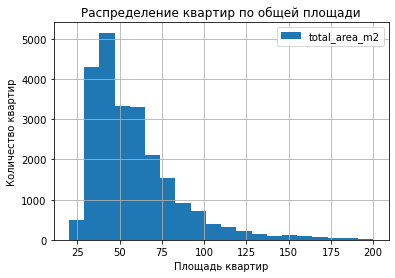

In [104]:
df.plot(kind='hist', y='total_area_m2', grid=True, bins=20, range=(20,200))
plt.title('Распределение квартир по общей площади')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество квартир')

Из графика видно, что отсновная масса квартир располагается в диапазоне 30-50м2.

Переведем столбец `last_price` в миллионы и построим гистограмму на основе этого столбца 

In [105]:
df['last_price_mln'] = round(df['last_price']/1000000,2)

Text(0, 0.5, 'Количетво квартир')

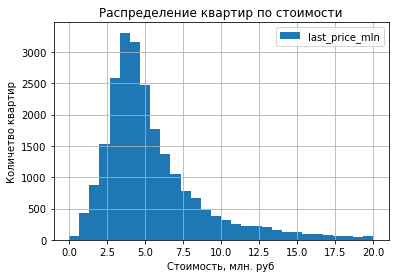

In [106]:
df.plot(kind='hist', y='last_price_mln', grid=True, bins=30, range=(0,20))
plt.title('Распределение квартир по стоимости')
plt.xlabel('Стоимость, млн. руб')
plt.ylabel('Количетво квартир')

Из графика видно, что большинство квартир располагаются в диапазоне цены от 2.5 до 5 млн. руб

Построим гистограмму столбца `number_of_rooms` 

Text(0, 0.5, 'Количество квартир')

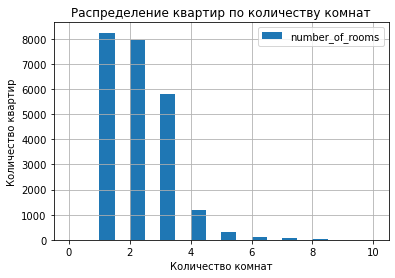

In [107]:
df.plot(kind='hist', y='number_of_rooms', grid=True, bins=20, range=(0,10))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Из графика видно, что большиство квартир имеет от 1 до 3-х комнат

Построим гистограмму столбца `ceiling_height_m` 

Text(0, 0.5, 'Количесвто квартир')

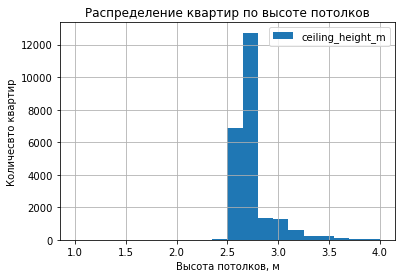

In [108]:
df.plot(kind='hist', y='ceiling_height_m', grid=True, bins=20, range=(1,4))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количесвто квартир')

Из графика видно, что большинство квартир имеют высоту потолка от 2.5 до 2.8 м

<a name="end4.1"></a>
### Вывод

Из полученной информации можно сделать вывод, что основную массу объявлений составляет квартиры площадью от 30 до 50м2, количество комнат от 1 до 3, высотой потолков 2.5 до 2.8 м и ценой от 2.5 до 5 млн. руб

<a name="subparagraph4.2"></a>
### 4.2 Изучение время продажи квартиры

Выведем статистическую информацию и построить boxplot, чтобы увидеть выбросы

In [109]:
df_days_exposition_not_null = df[df['days_exposition']>0]

In [110]:
df_days_exposition_not_null['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:xlabel='days_exposition'>

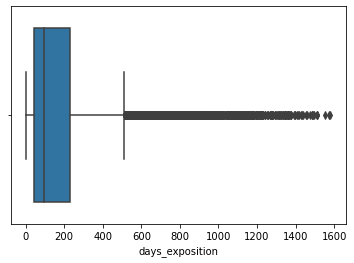

In [111]:
sns.boxplot(x=df_days_exposition_not_null['days_exposition'])

Из графика видно, что большенство значений лежит в пределах 250 дней, что соответствует статистическм данным по столбцу. Верхний ус графика упирается в значение около 450 дней, все что выше будет считаться выбросами.  
Построим гистограмму

Text(0, 0.5, 'Количество квартир')

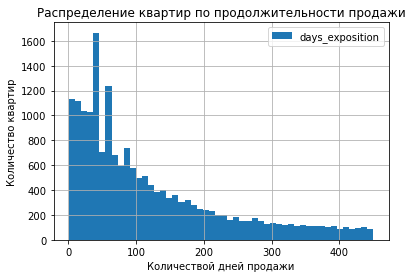

In [112]:
df_days_exposition_not_null.plot(kind='hist', y='days_exposition', grid=True, bins=50, range=(1,450))
plt.title('Распределение квартир по продолжительности продажи')
plt.xlabel('Количествой дней продажи')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

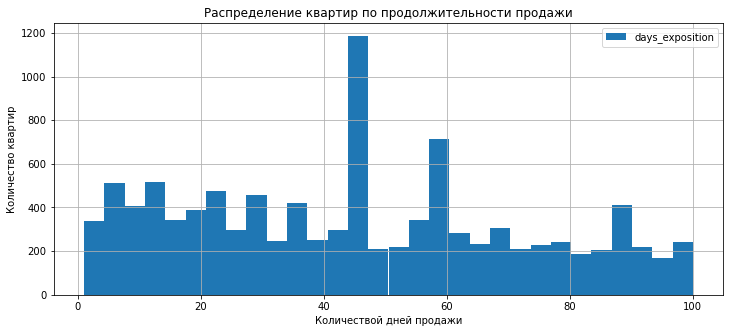

In [113]:
df_days_exposition_not_null.plot(kind='hist', y='days_exposition', grid=True, bins=30, range=(1,100), figsize=(12,5))
plt.title('Распределение квартир по продолжительности продажи')
plt.xlabel('Количествой дней продажи')
plt.ylabel('Количество квартир')

Такое ощущение, что пики появляются через неделю, возможно это связано с загрузкой данных о продаже квартиры

In [114]:
print('Среднее значение столбца "days_exposition" равно - {} дней, а медианное - {} дня'.
      format(int(df_days_exposition_not_null['days_exposition'].mean()), 
             int(df_days_exposition_not_null['days_exposition'].median())))

Среднее значение столбца "days_exposition" равно - 180 дней, а медианное - 95 дня


<a name="end4.2"></a>
### Вывод

Как мы видим среднее время продажи квартиры почти в 2 раза выше медианного, что говорит о большом количестве выбросов. На данные момент среднее время продажи квартиры поставляет около 6 месяцев.

<a name="subparagraph4.3"></a>
### 4.3 Избавляемся от редких и выбивающихся значений

В столбце `days_exposition` отбросим значения которые превышают верхний ус

In [115]:
days_exposition_quantile = (df['days_exposition'].quantile(0.75) 
                        + 1.5*(df['days_exposition'].quantile(0.75) 
                        - df['days_exposition'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(days_exposition_quantile))

Выбросами будем считать значения выше 464.5


In [116]:
good_df = df[df['days_exposition'] <= days_exposition_quantile]

In [117]:
print('Среднее значение столбца "days_exposition" равно - {} дней, а медианное - {} дня'.
      format(int(good_df['days_exposition'].mean()), 
             int(good_df['days_exposition'].median())))

Среднее значение столбца "days_exposition" равно - 104 дней, а медианное - 61 дня


In [118]:
good_df['days_exposition'].describe()

count    21677.000000
mean       104.030401
std        112.135497
min          0.000000
25%         18.000000
50%         61.000000
75%        154.000000
max        464.000000
Name: days_exposition, dtype: float64

Можем сказать, что продажи с продолжительностью более 454 дней можно отнести к необчно долгим, а если продажа закрывается в течении 111 дней, то продажу можно назвать относительно быстрой.

Посмотрим на статистические значения в столбце `total_area_m2` и отбросим значения которые превышают верхний ус

In [119]:
df['total_area_m2'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area_m2, dtype: float64

In [120]:
total_area_quantile = (df['total_area_m2'].quantile(0.75) 
                        + 1.5*(df['total_area_m2'].quantile(0.75) 
                        - df['total_area_m2'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(total_area_quantile))

Выбросами будем считать значения выше 114.75000000000001


In [121]:
good_df = good_df[good_df['total_area_m2'] <= total_area_quantile]

Так же предлагаю отбросить квартиры с общей площадью менее 25м2, вряд ли на площади меньше можно жить

In [122]:
good_df = good_df[good_df['total_area_m2'] >= 25]

In [123]:
good_df['total_area_m2'].describe()

count    20463.000000
mean        54.248043
std         18.985705
min         25.000000
25%         39.600000
50%         50.000000
75%         65.000000
max        114.600000
Name: total_area_m2, dtype: float64

Посмотрим на статистические значения в столбце `living_area_m2` и отбросим значения которые превышают верхний ус

In [124]:
df['living_area_m2'].describe()

count    23699.000000
mean        34.441445
std         21.801962
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area_m2, dtype: float64

In [125]:
living_area_quantile = (df['living_area_m2'].quantile(0.75) 
                        + 1.5*(df['living_area_m2'].quantile(0.75) 
                        - df['living_area_m2'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(living_area_quantile))

Выбросами будем считать значения выше 79.15


In [126]:
good_df = good_df[good_df['living_area_m2'] <= living_area_quantile]

Так же предлагаю убрать значения меньше 10м2, врядли на такой площади можно жить

In [127]:
good_df = good_df[good_df['living_area_m2'] > 10]

In [128]:
good_df['living_area_m2'].describe()

count    20375.000000
mean        30.951535
std         13.071818
min         10.080000
25%         18.100000
50%         30.000000
75%         40.000000
max         79.000000
Name: living_area_m2, dtype: float64

Посмотрим на статистические значения в столбце `kitchen_area_m2` и отбросим значения которые превышают верхний ус

In [129]:
df['kitchen_area_m2'].describe()

count    23699.000000
mean        10.558439
std          5.642888
min          1.300000
25%          7.400000
50%          9.550118
75%         11.600000
max        112.000000
Name: kitchen_area_m2, dtype: float64

In [130]:
kitchen_area_quantile = (df['kitchen_area_m2'].quantile(0.75) 
                        + 1.5*(df['kitchen_area_m2'].quantile(0.75) 
                        - df['kitchen_area_m2'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(kitchen_area_quantile))

Выбросами будем считать значения выше 17.9


In [131]:
good_df = good_df[good_df['kitchen_area_m2'] <= kitchen_area_quantile]

Так же предлагаю убрать значения меньше 5м2, врядли на такой кухне можно что то делать

In [132]:
good_df = good_df[good_df['kitchen_area_m2'] >= 5]

In [133]:
good_df['kitchen_area_m2'].describe()

count    19500.000000
mean         9.325505
std          2.699675
min          5.000000
25%          7.000000
50%          9.100000
75%         11.000000
max         17.900000
Name: kitchen_area_m2, dtype: float64

Посмотрим на статистические значения в столбце `last_price_mln` и отбросим значения которые превышают верхний ус

In [134]:
df['last_price_mln'].describe()

count    23699.000000
mean         6.541597
std         10.887011
min          0.010000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

In [135]:
last_price_quantile = (df['last_price_mln'].quantile(0.75) 
                        + 1.5*(df['last_price_mln'].quantile(0.75) 
                        - df['last_price_mln'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(last_price_quantile))

Выбросами будем считать значения выше 11.899999999999999


In [136]:
good_df = good_df[good_df['last_price_mln'] <= last_price_quantile]

Предлагаю посмотреть на квартиру с минимальной стоимостью, цена сильно отличается от средней

In [137]:
df[df['last_price_mln'] == df['last_price_mln'].min()]

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,...,nearest_pond_distance_m,days_exposition,price_per_square_meter,weekday,month,year,floor_for_group,part_of_living_area,part_of_kitchen_area,last_price_mln
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,NaN,8,111.83,Wednesday,March,2019,Последний,0.29,0.37,0.01


Квартира в Санкт-Петербурге с большой площадью и низкой ценой, предлагаю убрать ее из датафрейма

In [138]:
good_df = good_df[good_df['last_price_mln'] != good_df['last_price_mln'].min()]

In [139]:
good_df['last_price_mln'].describe()

count    18904.000000
mean         4.728488
std          2.106049
min          0.440000
25%          3.300000
50%          4.350000
75%          5.800000
max         11.890000
Name: last_price_mln, dtype: float64

Посмотрим на статистические значения в столбце `number_of_rooms` и отбросим значения которые превышают верхний ус

In [140]:
df['number_of_rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: number_of_rooms, dtype: float64

In [141]:
number_of_rooms_quantile = (df['number_of_rooms'].quantile(0.75) 
                        + 1.5*(df['number_of_rooms'].quantile(0.75) 
                        - df['number_of_rooms'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(number_of_rooms_quantile))

Выбросами будем считать значения выше 6.0


In [142]:
good_df = good_df[good_df['number_of_rooms'] <= number_of_rooms_quantile]

In [143]:
good_df['number_of_rooms'].describe()

count    18904.000000
mean         1.912876
std          0.866155
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: number_of_rooms, dtype: float64

Посмотрим на статистические значения в столбце `ceiling_height_m` и отбросим значения которые превышают верхний ус

In [144]:
df['ceiling_height_m'].describe()

count    23699.000000
mean         2.698389
std          0.236785
min          1.030000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height_m, dtype: float64

In [145]:
ceiling_height_quantile = (df['ceiling_height_m'].quantile(0.75) 
                        + 1.5*(df['ceiling_height_m'].quantile(0.75) 
                        - df['ceiling_height_m'].quantile(0.25))) 
print('Выбросами будем считать значения выше {}'.format(ceiling_height_quantile))

Выбросами будем считать значения выше 2.8500000000000005


In [146]:
good_df = good_df[good_df['ceiling_height_m'] <= ceiling_height_quantile]

Так же предлагаю избавиться от значений ниже 2.4м, а то получаются очень низкие потолки

In [147]:
good_df = good_df[good_df['ceiling_height_m'] >= 2.4]

In [148]:
good_df['ceiling_height_m'].describe()

count    17377.000000
mean         2.625972
std          0.081261
min          2.400000
25%          2.550000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height_m, dtype: float64

<a name="end4.3"></a>
### Вывод

На данном этапе мы избавились от выбросов которые находятся выше верхней границы уса ящика с усами. Так же мы избались от подозрительно низких значений.

<a name="subparagraph4.4"></a>
### 4.4 Определение факторов больше всего влияющих на стоимость квартиры

Посмотрим зависимость цены от площади 

In [149]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['total_area_m2'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен 0.66


Построим диаграмму рассеивания

Text(0, 0.5, 'Цена')

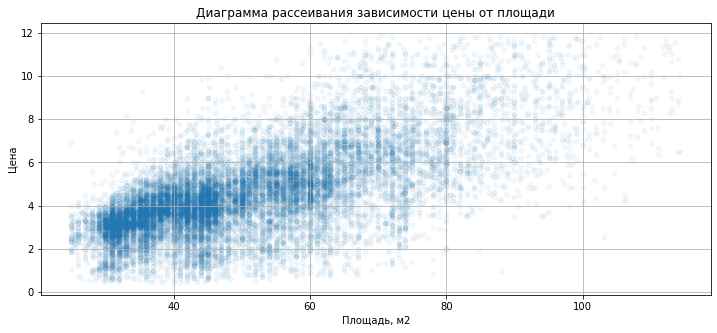

In [150]:
good_df.plot(kind='scatter', x='total_area_m2', y='last_price_mln', figsize=(12,5), alpha=0.05, grid=True)
plt.title('Диаграмма рассеивания зависимости цены от площади')
plt.xlabel('Площадь, м2')
plt.ylabel('Цена')

Коэффицент коррелации пирсона получился 0.67, что говорит нам о том, что при росте площади - растер и цена и так как коэффицент близок к 1 - это говорит о том, что взаимосвязь достаточно сильная.  
Из диаграммы рассеивания видно, что при росте площади увеличивается и цена, но видны и варианты где большая площадь, а цена маленькая, но их очень мало

Посмотрим зависимость цены от количества комнат

In [151]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['number_of_rooms'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен 0.41


Построим диаграмму рассеивания

Text(0, 0.5, 'Цена')

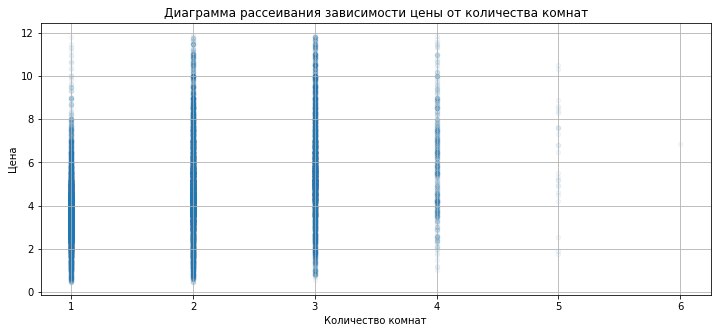

In [152]:
good_df.plot(kind='scatter', x='number_of_rooms', y='last_price_mln', figsize=(12,5), alpha=0.05, grid=True)
plt.title('Диаграмма рассеивания зависимости цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

Построим график зависимости цены от количества комнат

Text(0, 0.5, 'Цена')

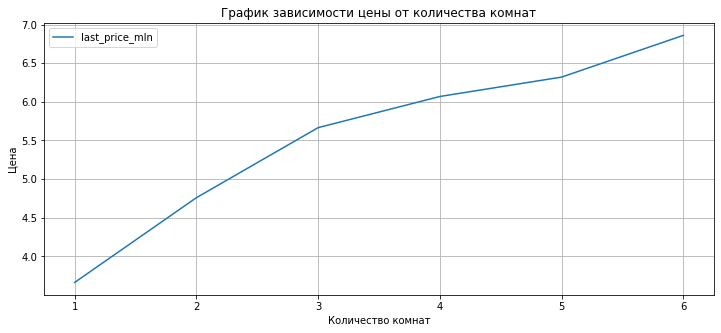

In [153]:
good_df.pivot_table(index='number_of_rooms', values='last_price_mln').plot(figsize=(12,5), grid=True)
plt.title('График зависимости цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

Коэффицент коррелации пирсона получился 0.41, что говорит нам о том, что при увеличении числа комнат - растер и цена, но так как он не очень большой, то это говорит нам о том, что сильной зависимости нет.  
Из графика зависимости цены от количества комнат видно, что при росте числа комнат растет и цена, но если комнат становится больше 3 цена растет уже не так сильно.

Посмотрим зависимость цены от удаленности от центра

In [154]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['city_center_distance_m'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен -0.32


График зависимости цены от удаленности от центра

Text(0, 0.5, 'Цена')

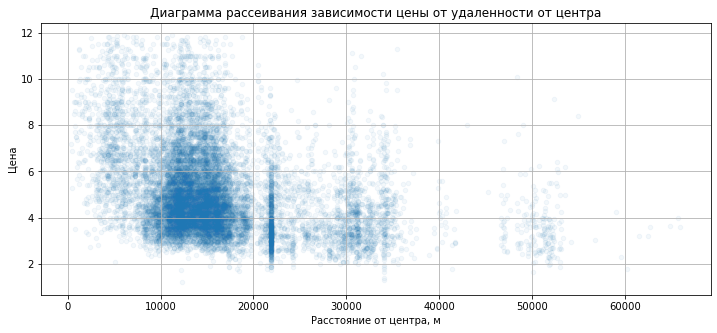

In [155]:
good_df.plot(kind='scatter', x='city_center_distance_m', y='last_price_mln', figsize=(12,5), alpha=0.05, grid=True)
plt.title('Диаграмма рассеивания зависимости цены от удаленности от центра')
plt.xlabel('Расстояние от центра, м')
plt.ylabel('Цена')

Коэффицент коррелации пирсона получился -0.31, что говорит нам о том, что при увеличении расстояния от центра - цена падает, но так как коэффицент не очень большой, то это говорит нам о том, что зависимости почти нет.  
По диграмме видно, что основная масса квартир располагается между 10000 и 20000м от центра города, правее распологается четко выраженная полоса - это заполненные пропущенные значения.  
Так же видно, что есть квартиры которые располагаются очень далеко, при этом цена не сильно растет

Посмотрим на зависимость цены относительно этажа квартиры

Text(0, 0.5, 'Цена')

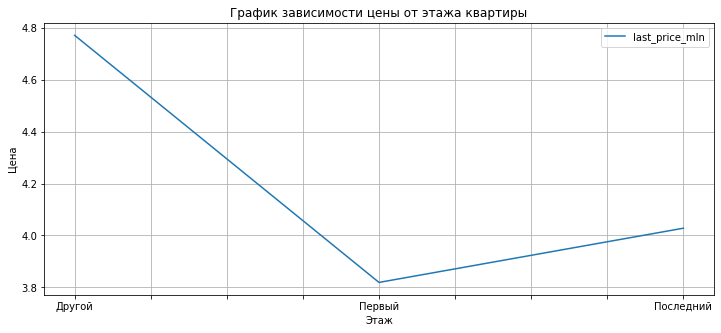

In [156]:
good_df.pivot_table(index='floor_for_group', values='last_price_mln').plot(figsize=(12,5), grid=True)
plt.title('График зависимости цены от этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Цена')

In [157]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['floor'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен 0.21


Text(0, 0.5, 'Цена')

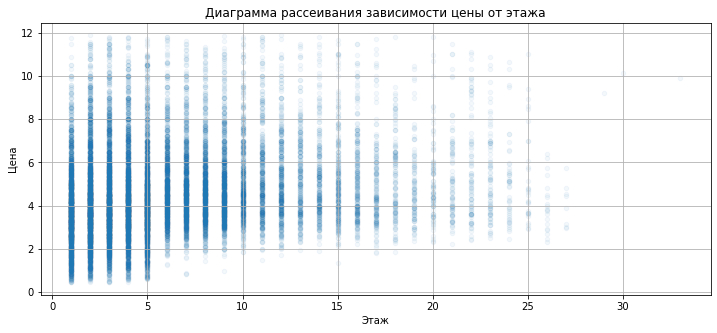

In [158]:
good_df.plot(kind='scatter', x='floor', y='last_price_mln', figsize=(12,5), alpha=0.05 ,grid=True)
plt.title('Диаграмма рассеивания зависимости цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

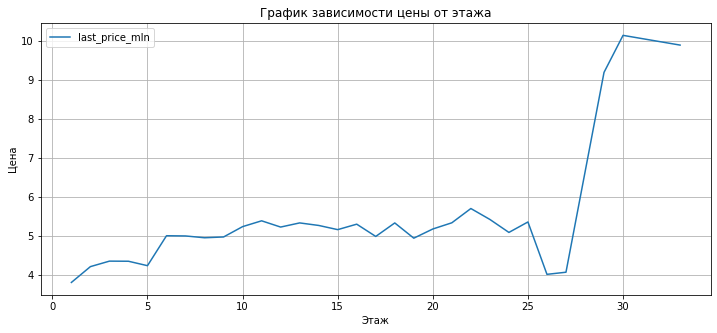

In [159]:
good_df.pivot_table(index='floor', values='last_price_mln').plot(figsize=(12,5), grid=True)
plt.title('График зависимости цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')

Как мы видим, квартиры на других этажах стоят дороже чем квартиры на первом или последнем этаже. Квартиры на первом этаже самые дешевые.  
Коэффицент корреляции Пирсона показывает слабую зависимость, при росте высоты расположения квартиры растет и цена, так же из графика видно, что есть редкие значения с очень высокой ценой.

Посмотрим на зависимость от дня недели публикации

Приведем столбец в целочисленному виду

In [160]:
good_df['weekday'] = good_df['first_day_exposition'].dt.weekday

In [161]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['weekday'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен -0.01


Text(0, 0.5, 'Цена')

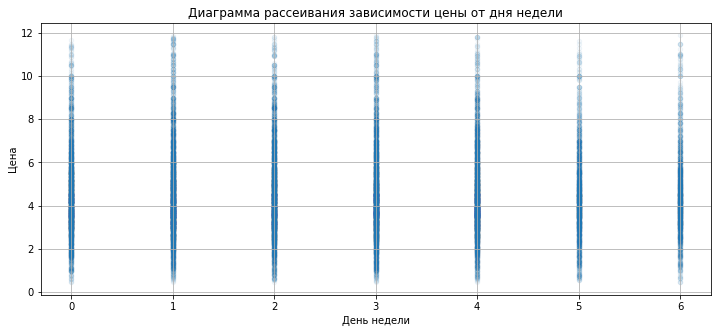

In [162]:
good_df.plot(kind='scatter', x='weekday', y='last_price_mln', figsize=(12,5), alpha=0.05, grid=True)
plt.title('Диаграмма рассеивания зависимости цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

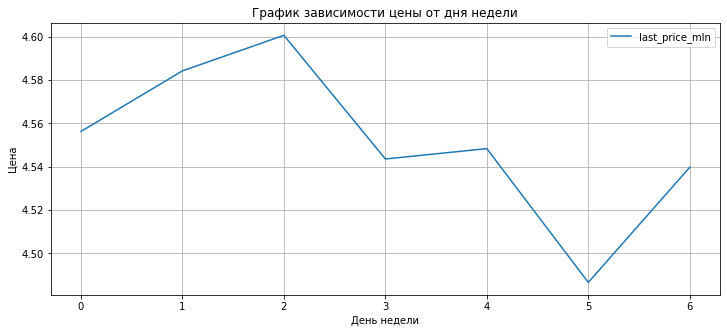

In [163]:
good_df.pivot_table(index='weekday', values='last_price_mln').plot(figsize=(12,5), grid=True)
plt.title('График зависимости цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')

Коэффицент коррелиции Пирсона равен -0.01, это говорит о том, что взаимосвязь практически отсутствует и говорит о том, что чем ближе выходные - тем цена ниже.  
Диаграмма рассеивания показывает примерно тоже самое, на выходных выставляют квартиры по более низкой цене.  
График зависимости тоже это подтверждает, до середины недели выкладывают объявления с большими ценами, а после уже идет тенденция на снижение.

Посмотрим на зависимость цены от месяца публикации

Приведем столбец к целочисленному виду

In [164]:
good_df['month'] = good_df['first_day_exposition'].dt.month

In [165]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['month'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен 0.0


Text(0, 0.5, 'Цена')

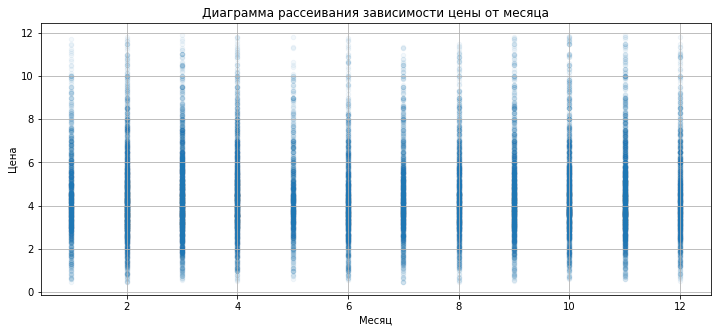

In [166]:
good_df.plot(kind='scatter', x='month', y='last_price_mln', figsize=(12,5), alpha=0.05, grid=True)
plt.title('Диаграмма рассеивания зависимости цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

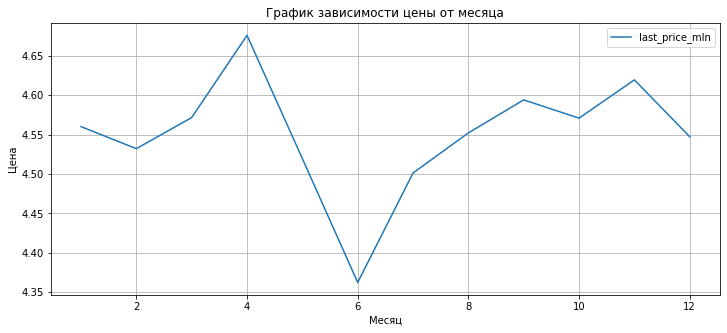

In [167]:
good_df.pivot_table(index='month', values='last_price_mln').plot(figsize=(12,5), grid=True)
plt.title('График зависимости цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')

Коэффицент корреляции Пирсона равен 0 и говорит нам о том, что какая либо зависимость между ценой и месяцем отсутствует.  
Диаграмма рассеивания не показала сильных различий по цене между месяцами.  
Из графика зависимости видно, что к лету цены сильно падаюти потом начинают отростать к осени на прежний уровень.

Посмотри на зависимость между ценой и годом

In [168]:
print('Коэффицент корреляции Пирсона равен {}'.
      format(round(good_df['year'].corr(good_df['last_price_mln']),2)))

Коэффицент корреляции Пирсона равен 0.03


Text(0, 0.5, 'Цена')

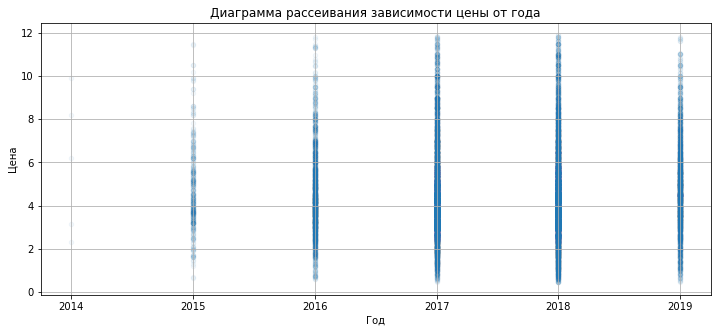

In [169]:
good_df.plot(kind='scatter', x='year', y='last_price_mln', figsize=(12,5), alpha=0.05, grid=True)
plt.title('Диаграмма рассеивания зависимости цены от года')
plt.xlabel('Год')
plt.ylabel('Цена')

Text(0, 0.5, 'Цена')

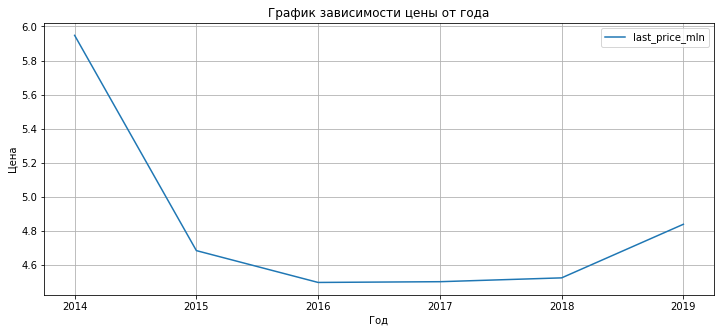

In [170]:
good_df.pivot_table(index='year', values='last_price_mln').plot(figsize=(12,5), grid=True)
plt.title('График зависимости цены от года')
plt.xlabel('Год')
plt.ylabel('Цена')

Коэффицент корреляции Пирсона равен 0.03 и говорит нам о том, что зависимость междуй ценой и годом практически отсутствует, она положительная, поэтому при повышении года повышается и цена.  
Из даиграммы рассеивания видно, что плотность данных до 2017 года была не очень большая, а после начала расти.  
График зависимости показывает, что цены пошли резко вверх с 2018 года.

<a name="end4.4"></a>
### Вывод

Основными факторами которые влияют на стоимость квартиры можно назвать:  
* Площадь квартиры, при увеличении площади растет и цена
* Количество комнат, при увеличении количества комнат растет и цена
* Расстояние до центра, чем дальше от центра тем ниже цена
* Этаж, квартиры на первом и последнем этаже стоят дешевле чем другие.

День недели, месяц и год публикации почти никак не влияют на стоимость квартиры.

<a name="subparagraph4.5"></a>
### 4.5 Топ 10 городов по количество объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах

In [171]:
top_10_city = (good_df.pivot_table(index='town_name', values=['last_price', 'price_per_square_meter'], 
                                   aggfunc={'last_price': 'count', 'price_per_square_meter':'mean'}).
               sort_values(by='last_price', ascending=False).head(10))
top_10_city

,last_price,price_per_square_meter
town_name,,
санкт-петербург,10769,104258.650852
мурино,493,85791.016795
шушары,398,78044.005980
кудрово,374,95459.421738
всеволожск,330,66944.938667
парголово,294,90477.946735
колпино,293,75160.253038
пушкин,265,99152.698528
гатчина,254,68501.650039


 Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья

In [172]:
top_10_city.sort_values(by='price_per_square_meter', ascending=False)

,last_price,price_per_square_meter
town_name,,
санкт-петербург,10769,104258.650852
пушкин,265,99152.698528
кудрово,374,95459.421738
парголово,294,90477.946735
мурино,493,85791.016795
шушары,398,78044.005980
колпино,293,75160.253038
гатчина,254,68501.650039
всеволожск,330,66944.938667


<a name="end4.5"></a>
### Вывод

Из полученных сводных таблиц можно сделать вывод, что большинство объявлений раполагается в самом Санкт-Петербурге и там самая высокая цена квадратного метра. По количество объявления Мурино занимает второе местро, а вот по цене квадратного метра проигрывает Пушкину, Кудрово и Парголово, скорее всего, в Мурино располагаются не самые хорошие квартиры.

<a name="subparagraph4.6"></a>
### 4.6 Изучение предложений квартир по Санкт-Петербургу

Выделим квартиры в Санкт-Петербурге 

In [173]:
df_spb = good_df[good_df['town_name']=='санкт-петербург'].copy()

Создадим столбец с расстоянием до центра в километрах и округлим до целых значений

In [174]:
df_spb['city_center_distance_km'] = df_spb['city_center_distance_m']/1000

In [175]:
df_spb['city_center_distance_km'] = df_spb['city_center_distance_km'].astype('int')
print('Тип данных: {}'.format(df_spb['city_center_distance_km'].dtype))

Тип данных: int64


Text(0, 0.5, 'Цена')

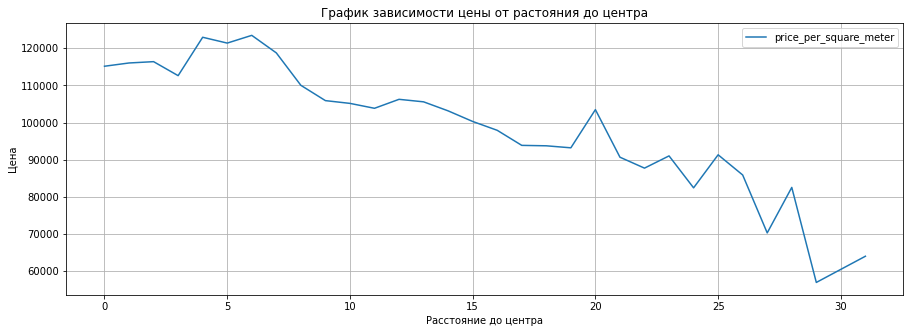

In [176]:
(df_spb.pivot_table(index='city_center_distance_km', values='price_per_square_meter', aggfunc='mean').
    plot(figsize=(15,5), grid=True))
plt.title('График зависимости цены от растояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')

График планомерно опускается до расстояния 12км, дальше цены начинают падать и потом скакать вверх-вниз, поэтому предлагаю считать центр в пределах 12км.

<a name="end4.6"></a>
### Вывод

После изучения полученных результатов, мы сделали вывод, что центр города располагется в пределах 12 км

<a name="subparagraph4.7"></a>
### 4.7 Изучение предложений квартир по центру Санкт-Петербурга

Выделим квартиры в центре Санкт-Петербурга и за центром

In [177]:
df_spb_centr = df_spb[df_spb['city_center_distance_km']<=12]
df_spb_after_centr = df_spb[df_spb['city_center_distance_km']>12]

Сравним числовое описание столбцов: площадь, цена, число комнат, высота потолков в центре Санкт-Петербурга и за центром 

In [178]:
# Выведем значения в центре Санкт-Петербурга

df_spb_centr[['total_area_m2', 'last_price_mln', 'number_of_rooms', 'ceiling_height_m']].describe()

,total_area_m2,last_price_mln,number_of_rooms,ceiling_height_m
count,5115.000000,5115.000000,5115.000000,5115.000000
mean,52.360063,5.629533,1.938612,2.629834
std,17.068380,2.017144,0.869093,0.081954
min,25.000000,1.200000,1.000000,2.400000
25%,39.800000,4.100000,1.000000,2.570000
50%,48.500000,5.100000,2.000000,2.650000
75%,62.200000,6.750000,3.000000,2.650000
max,114.200000,11.880000,6.000000,2.850000


In [179]:
# Выведем значения за центром Санкт-Петербурга

df_spb_after_centr[['total_area_m2', 'last_price_mln', 'number_of_rooms', 'ceiling_height_m']].describe()

,total_area_m2,last_price_mln,number_of_rooms,ceiling_height_m
count,5654.000000,5654.000000,5654.000000,5654.000000
mean,51.350299,5.061696,1.873718,2.627294
std,16.284903,1.689773,0.860912,0.084736
min,25.000000,1.700000,1.000000,2.400000
25%,39.000000,3.832500,1.000000,2.550000
50%,47.000000,4.650000,2.000000,2.650000
75%,61.500000,5.900000,3.000000,2.650000
max,114.000000,11.800000,5.000000,2.850000


При сравнении полученных результатов можно сделать следующие выводы:  
1) Площадь квартир в центре города чуть выше чем по всему городу: 48.5 м2 против 47 м2. Так же самая большая квартира находится в центре Санкт-Петербурга, ее площадь равна 114.2 м2.    
2) Цена на квартиру так же в центре выше, чем по всему городу: 5.1 млн/руб против 4.65 млн/руб. В центре есть квартиры дешевле чем за центром: 1.2 млн/руб против 1.7 млн.руб.  
3) В центре есть квартиры в которых 6 комнат, в остальной части города максимальное значение равно 5.  
4) Особых различий по высоте потолков в городе нет. В основном выставляют квартиры с высотой потолков 2.65 м.

Посмотрим как количество комнат влиет на цену

In [180]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(df_spb_centr['number_of_rooms'].corr(df_spb_centr['last_price_mln']),2)))
print('Коэффицент корреляции Пирсона за центром города равен {}'.
      format(round(df_spb_after_centr['number_of_rooms'].corr(df_spb_after_centr['last_price_mln']),2)))

Коэффицент корреляции Пирсона в центре города равен 0.45
Коэффицент корреляции Пирсона за центром города равен 0.53


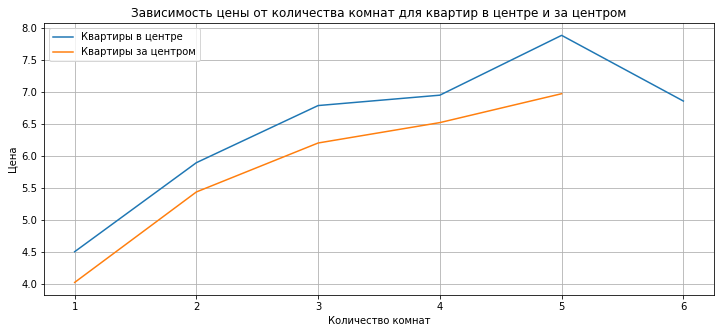

In [181]:
df_spb_centr_rooms = df_spb_centr.pivot_table(index ='number_of_rooms', values = 'last_price_mln')
df_spb_after_centr_rooms= df_spb_after_centr.pivot_table(index ='number_of_rooms', values = 'last_price_mln')

fig, ax = plt.subplots()
ax.plot(df_spb_centr_rooms, label = 'Квартиры в центре')
ax.plot(df_spb_after_centr_rooms, label = 'Квартиры за центром')
ax.legend()
plt.title('Зависимость цены от количества комнат для квартир в центре и за центром')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

По полученным коэффицентам корреляции Пирсона можем сделать выводы, что количесвто комнат оказывает влияние на стоимость квартиры. При увеличении числа комнат растет и цена, это относится к квартирам и в центре и за центром.  
По графику видно, что при увеличении числа комнат расет и цена, в центре цена чуть выше.

Посмотрим как этаж влиет на цену

In [182]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(df_spb_centr['floor'].corr(df_spb_centr['last_price_mln']),2)))
print('Коэффицент корреляции Пирсона за центром города равен {}'.
      format(round(df_spb_after_centr['floor'].corr(df_spb_after_centr['last_price_mln']),2)))

Коэффицент корреляции Пирсона в центре города равен 0.12
Коэффицент корреляции Пирсона за центром города равен 0.19


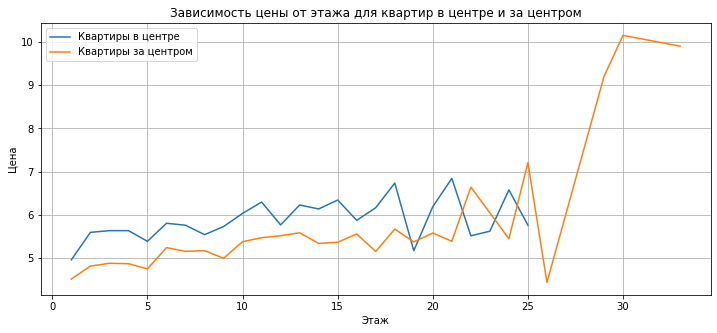

In [183]:
df_spb_centr_rooms = df_spb_centr.pivot_table(index ='floor', values = 'last_price_mln')
df_spb_after_centr_rooms= df_spb_after_centr.pivot_table(index ='floor', values = 'last_price_mln')

fig, ax = plt.subplots()
ax.plot(df_spb_centr_rooms, label = 'Квартиры в центре')
ax.plot(df_spb_after_centr_rooms, label = 'Квартиры за центром')
ax.legend()
plt.title('Зависимость цены от этажа для квартир в центре и за центром')
plt.xlabel('Этаж')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

Полученные коэффиценты корреляции Пирсона говорят о том, что есть небольшая зависимость между этажом и ценой квартиры, при увеличении этажа - растет и цена.  
На графике видно, что значения скачат вверх-вниз, но в целом показывают рост, но при это за центром есть очень низкие и очень высокие значения, возможно это выбросы.

Посмотрим как удаленность от центра города влияет на стоимость квартиры

In [184]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(df_spb_centr['city_center_distance_km'].corr(df_spb_centr['last_price_mln']),2)))
print('Коэффицент корреляции Пирсона за центром города равен {}'.
      format(round(df_spb_after_centr['city_center_distance_km'].corr(df_spb_after_centr['last_price_mln']),2)))

Коэффицент корреляции Пирсона в центре города равен -0.34
Коэффицент корреляции Пирсона за центром города равен -0.12


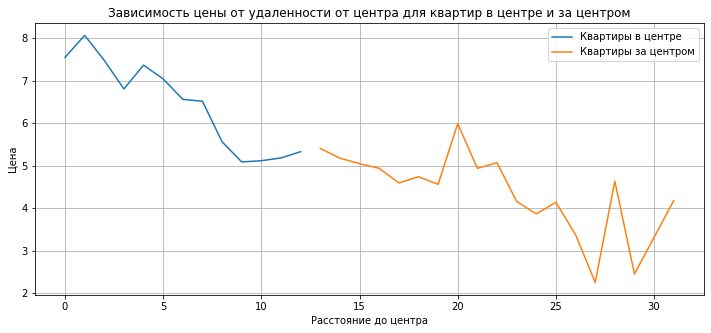

In [185]:
df_spb_centr_rooms = df_spb_centr.pivot_table(index ='city_center_distance_km', values = 'last_price_mln')
df_spb_after_centr_rooms= df_spb_after_centr.pivot_table(index ='city_center_distance_km', values = 'last_price_mln')

fig, ax = plt.subplots()
ax.plot(df_spb_centr_rooms, label = 'Квартиры в центре')
ax.plot(df_spb_after_centr_rooms, label = 'Квартиры за центром')
ax.legend()
plt.title('Зависимость цены от удаленности от центра для квартир в центре и за центром')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

Полученные коэффиценты корреляции Пирсона говорят о том, что есть небольшая зависимость между расстоянием до центра и ценой квартиры, при увеличении расстояния - цена падает, на графике это видно.

Посмотрим как день недели размещения объявления влияет на стоимость квартиры

In [186]:
print('Коэффицент корреляции Пирсона в центре города равен {}'.
      format(round(df_spb_centr['weekday'].corr(df_spb_centr['last_price_mln']),2)))
print('Коэффицент корреляции Пирсона за центром города равен {}'.
      format(round(df_spb_after_centr['weekday'].corr(df_spb_after_centr['last_price_mln']),2)))

Коэффицент корреляции Пирсона в центре города равен -0.01
Коэффицент корреляции Пирсона за центром города равен 0.01


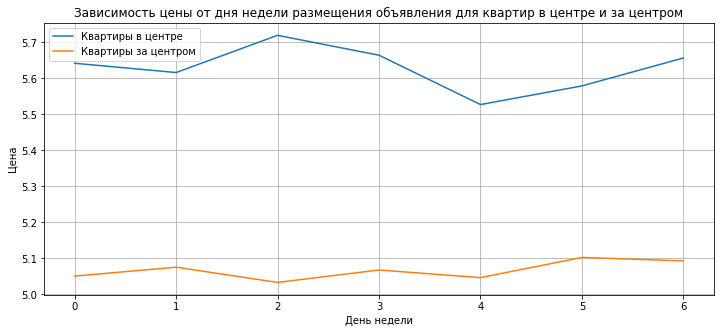

In [187]:
df_spb_centr_rooms = df_spb_centr.pivot_table(index ='weekday', values = 'last_price_mln')
df_spb_after_centr_rooms= df_spb_after_centr.pivot_table(index ='weekday', values = 'last_price_mln')

fig, ax = plt.subplots()
ax.plot(df_spb_centr_rooms, label = 'Квартиры в центре')
ax.plot(df_spb_after_centr_rooms, label = 'Квартиры за центром')
ax.legend()
plt.title('Зависимость цены от дня недели размещения объявления для квартир в центре и за центром')
plt.xlabel('День недели')
plt.ylabel('Цена')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid()
plt.show()

Полученные коэффиценты корреляции Пирсона говорят о том, что есть небольшая зависимость между днем недели размещения объявления и ценой квартиры - почти отсутствует. График так же не показывает особо сильный колебаний.

<a name="end4.7"></a>
### Вывод

Больших отличий между центром Санкт-Петербурга и остальной его частью - нет. Основные различия в том, что в центре квартиры с чуть большей площадью, ценой и количесвтом комнат.

<a name="paragraph5"></a>
## Общий вывод

При подготовке данных к анализу мы столкнулись с большим количеством пропусков, которые могут влиять на среднюю стоимость квартиры, поэтому пришлось заполнять ропущенные значения средними или медианными значениями, чтобы сохранить полученные данные. Некоторые данные оставили без изменений с пропущенными значениями. Скорее всего, ошибки в данных и пропущенные значения носят человеческий фактор и была допущена ошибка при заполнении или выгрузке данных.  

После подготовки данных к анализу мы изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра. Изучили время продажи квартиры и описали сколько обычно занимает продажа. Убрали редкие и выбивающиеся значения. Изучили, зависит ли цена от площади, числа комнат, удалённости от центра, а так же посмотрели на зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом и изучили зависимость от даты размещения: дня недели, месяца и года.  

После этого мы выделили 10 населённых пунктов с наибольшим числом объявлений, посчитали среднюю цену квадратного метра в этих населённых пунктах. Выделили населённые пункты с самой высокой и низкой стоимостью жилья. При анализе данных для большей наглядности использовали графики.  

После анализа, можно сделать вывод, что лидером по размещению объявлений по продаже квартир является Санкт-Петерубруг. Выяснили, что основными параметрами, которые влияют на стоимость квартиры являются: 
   * площадь квартиры - чем больше площадь, тем дороже квартира; 
   * количество комнат - чем больше комнат, тем дороже квартира; 
   * удаленность от центра - чем дальше от центра, тем дешевле квартира. 

Основную массу объявлений составляют квартиры:  
   * с площадью от 30 до 50м2;   
   * с количество комнат от 1 до 3;  
   * с высотой потолков от 2.5 до 2.8 м;   
   * с ценой от 2.5 до 5 млн. руб.  
   
В основном, дороже продаются квартиры, которые располагаются не на первом и не на последнем этаже. После анализа данных стало понятно, что после 2017 года увеличилось количество объявлений и цена на квартиры стали расти.

При анализе квартир в Санкт-Петербурге, мы сделали разбивку на квартиры которые находятся в центре и за центром и получили следующие результаты:
1) Площадь квартир в центре города чуть выше чем по всему городу: 48.5 м2 против 47 м2. Так же самая большая квартира находится в центре Санкт-Петербурга, ее площадь равна 114.2 м2.  
2) Цена на квартиру так же в центре выше, чем по всему городу: 5.1 млн.руб против 4.65 млн.руб. В центре есть квартиры дешевле чем за центром: 1.2 млн.руб против 1.7 млн.руб.  
3) В центре есть квартиры в которых 6 комнат, в остальной части города максимальное значение равно 5.  
4) Особых различий по высоте потолков в городе нет. В основном выставляют квартиры с высотой потолков 2.65 м.  
